**The task: To classify whether the tumor is benign (B) or malignant (M)**

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("E:\\DATASETS\\uci breast cancer dataset.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df=df.drop(["id","Unnamed: 32"],axis=1)

In [7]:
#df.columns.to_list()

In [8]:
df1=df.copy()
df2=df.copy()

In [9]:
df1.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

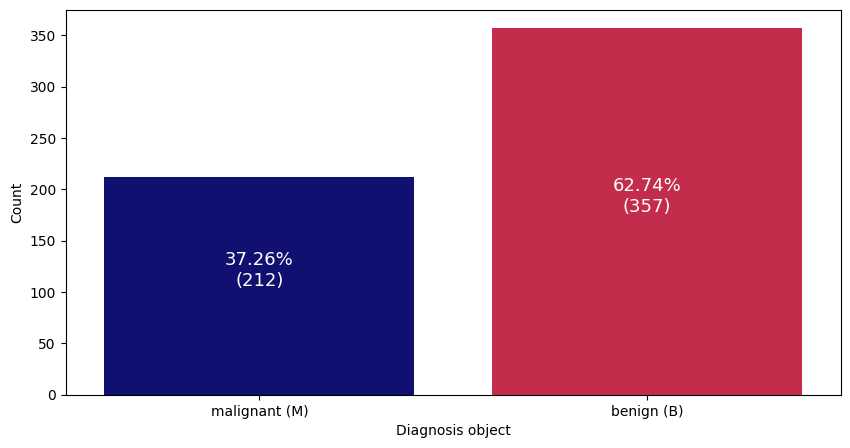

In [10]:
target_count = df1['diagnosis'].value_counts()
# Set custom colors
death_color = ['navy', 'crimson']
# Create a figure and axes
plt.figure(figsize=(10, 5))
# Create a count plot
sns.countplot(data=df1, x='diagnosis', palette=death_color)
# Add percentage labels
for name, val in zip(target_count.index, target_count.values):
    plt.text(name, val / 2, f'{round(val / sum(target_count) * 100, 2)}%\n({val})',
             ha='center', color='white', fontdict={'fontsize': 13})
# Customize x and y ticks
plt.xticks(ticks=target_count.index, labels=['benign (B)', 'malignant (M)'])
# Add title and labels
plt.xlabel('Diagnosis object')
plt.ylabel('Count')
# Show the plot
plt.show()

In [11]:
for col in df1.columns:
    print(col,":",df1[col].nunique())

diagnosis : 2
radius_mean : 456
texture_mean : 479
perimeter_mean : 522
area_mean : 539
smoothness_mean : 474
compactness_mean : 537
concavity_mean : 537
concave points_mean : 542
symmetry_mean : 432
fractal_dimension_mean : 499
radius_se : 540
texture_se : 519
perimeter_se : 533
area_se : 528
smoothness_se : 547
compactness_se : 541
concavity_se : 533
concave points_se : 507
symmetry_se : 498
fractal_dimension_se : 545
radius_worst : 457
texture_worst : 511
perimeter_worst : 514
area_worst : 544
smoothness_worst : 411
compactness_worst : 529
concavity_worst : 539
concave points_worst : 492
symmetry_worst : 500
fractal_dimension_worst : 535


In [12]:
num_cols=df1.drop("diagnosis",axis=1)

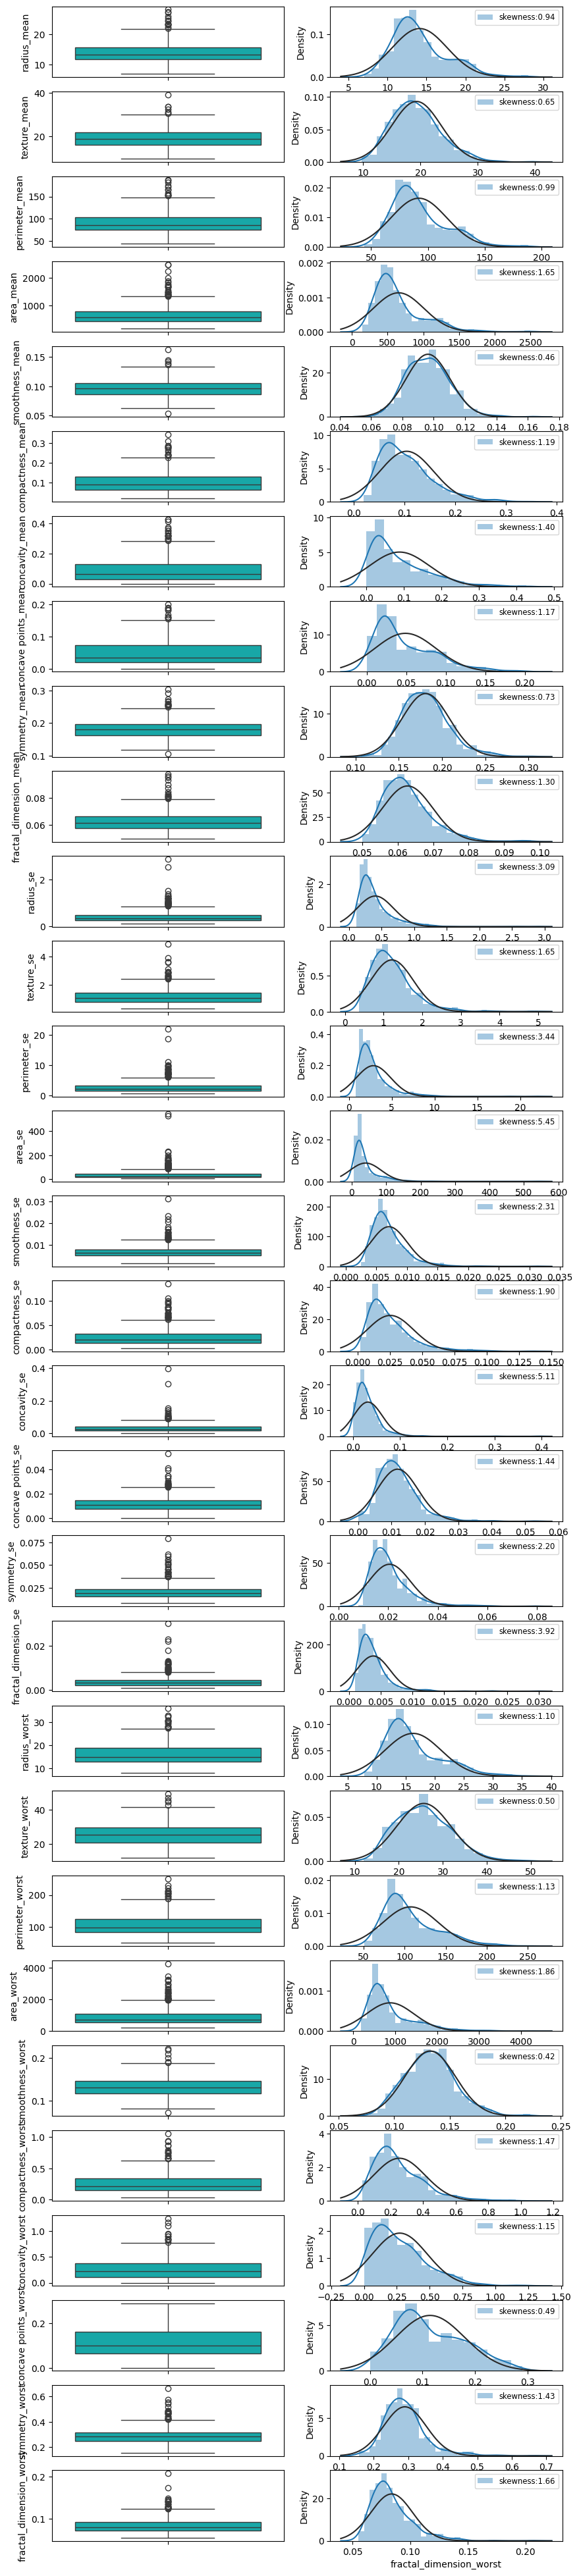

In [13]:
from scipy.stats import norm
plt.figure(figsize=(10,50))
j = 1
for i in num_cols:
    plt.subplot(30,2, j)
    sns.boxplot(num_cols[i], color="c")
    plt.subplot(30,2, j+1)
    sns.distplot(num_cols[i], label=f"skewness:{df[i].skew():.2f}", fit=norm)
    j = j +2
    plt.legend(fontsize="small")
#    plt.suptitle("Distributions of numerical variables\n\n", fontsize=15)
#plt.tight_layout()
plt.show()

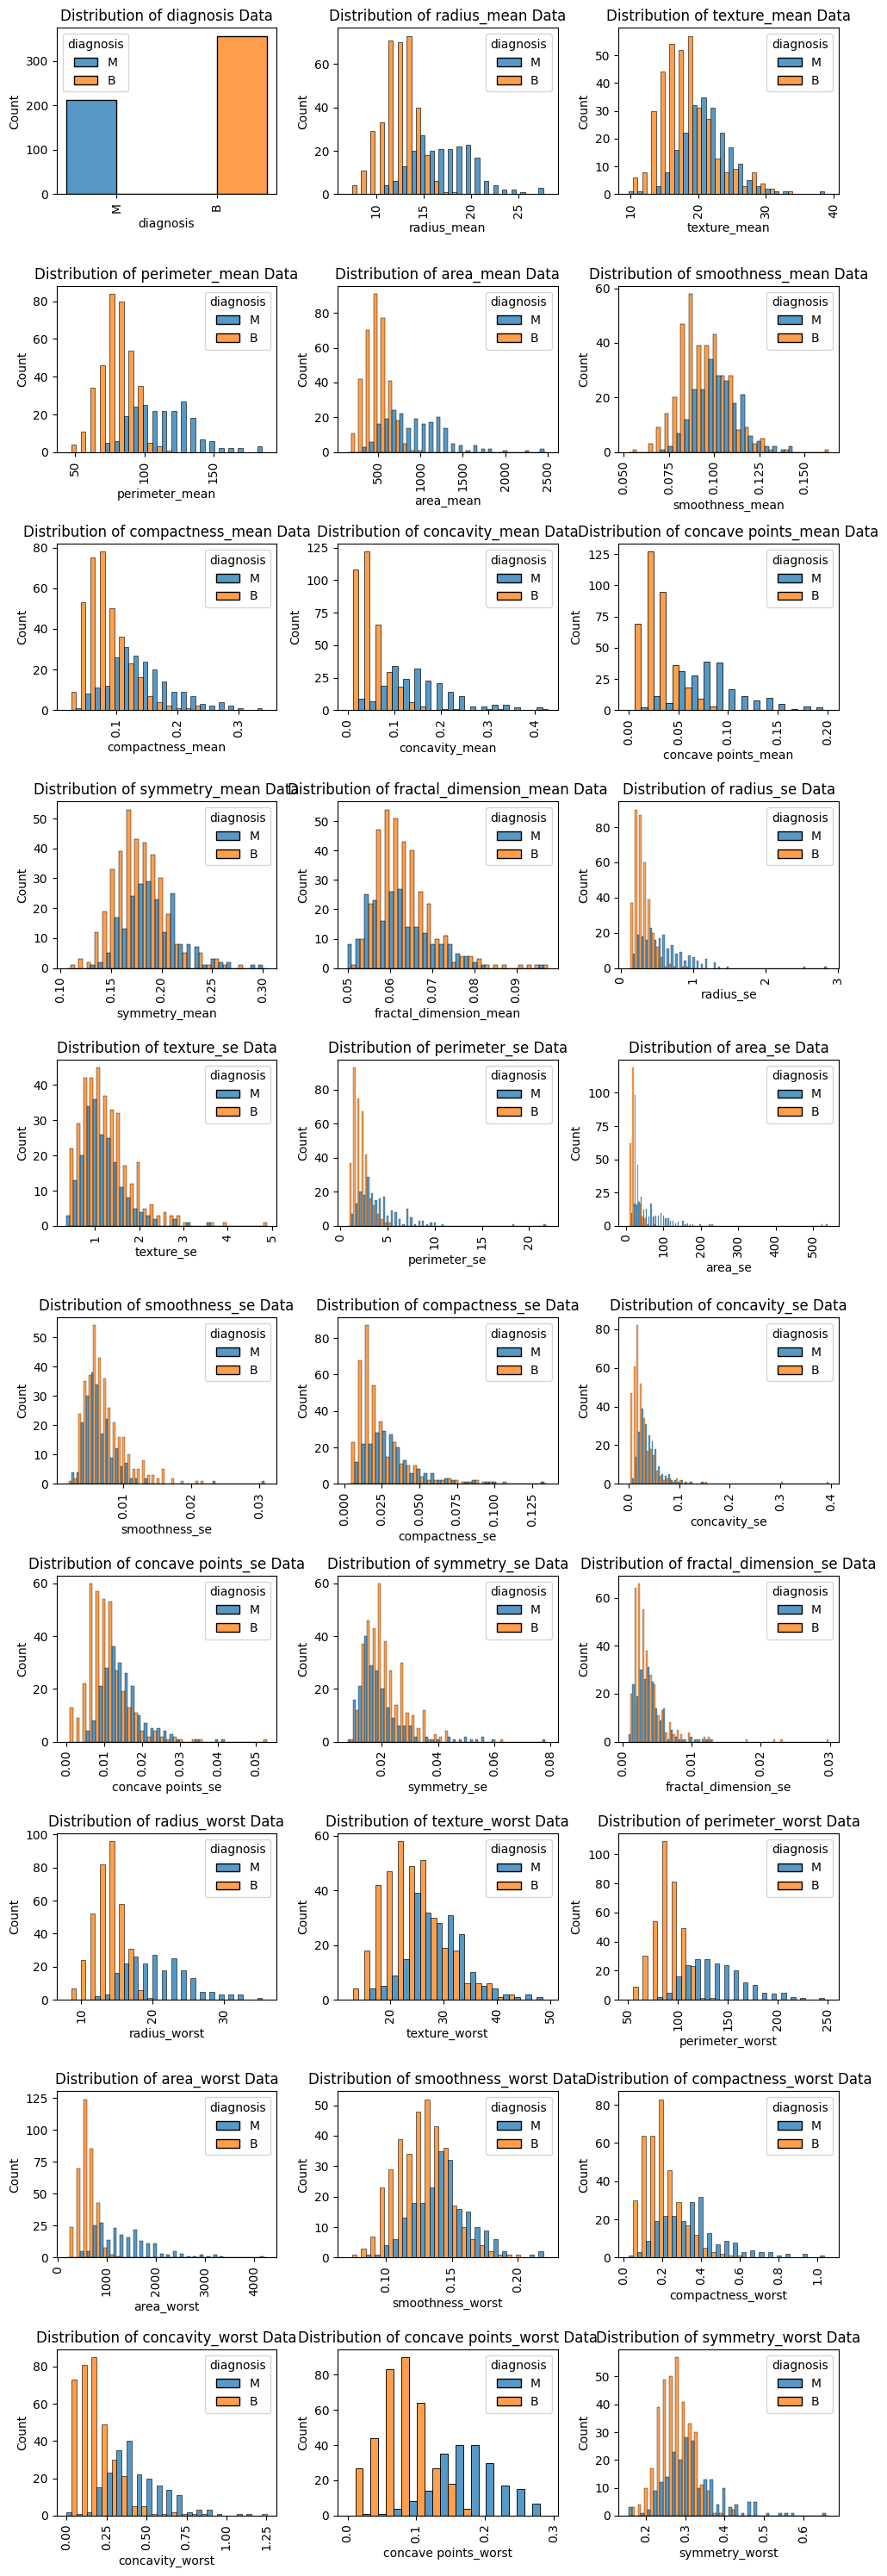

In [14]:
plt.figure(figsize = (10, 30))
for i, col in enumerate(df1.columns[:-1], 1):
    plt.subplot(10, 3, i)
    sns.histplot(x = df1[col], hue = df["diagnosis"], multiple = "dodge")
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.xticks(rotation = 90)
    plt.plot()

In [15]:
correlation=num_cols.corr().T
correlation

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


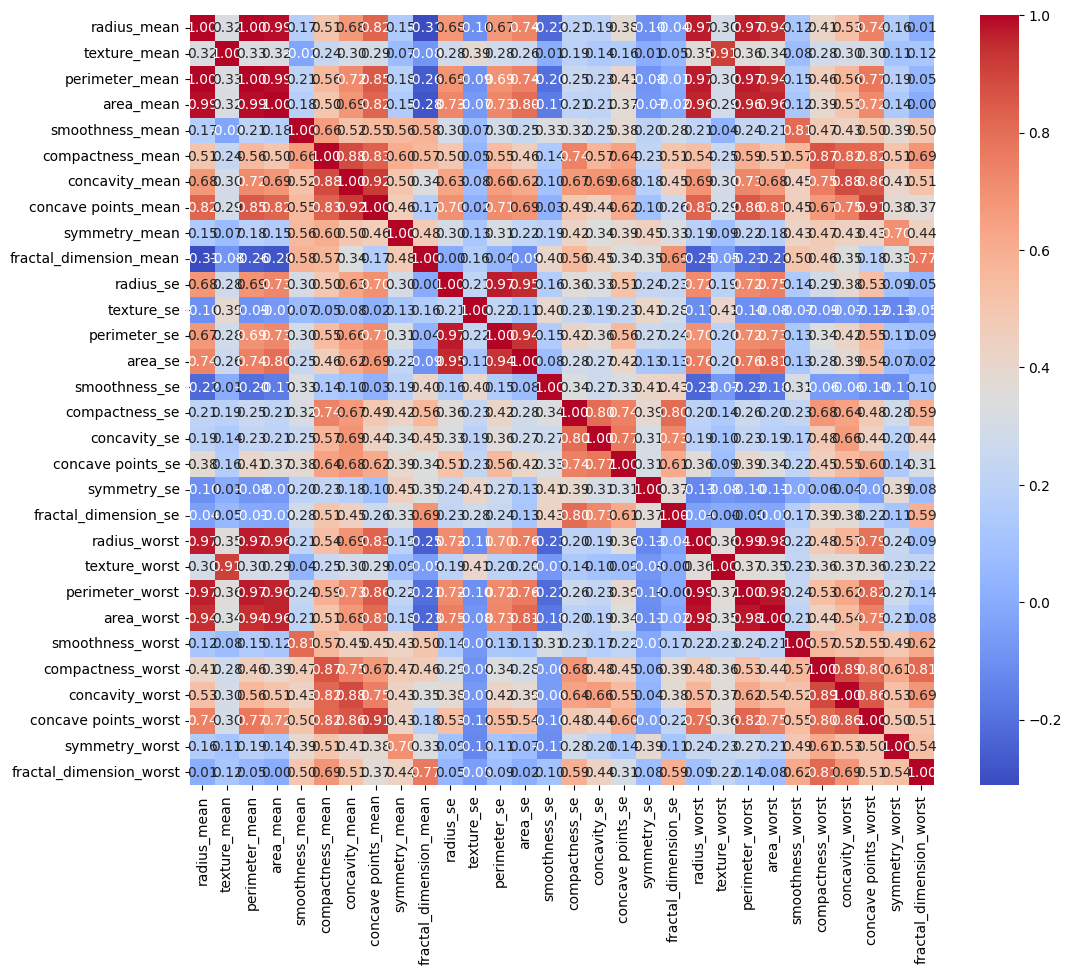

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation,annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [17]:
#threshold=0.8
#high_corr_positive=correlation[(correlation >= threshold ) & (correlation <1.0)]
#high_corr_positive.dropna(how='all').dropna(axis=1, how='all')
#positive and negetive
#high_corr_both = correlation[(correlation.abs() >= threshold) & (correlation.abs() < 1.0)]
#significant_correlations = high_corr_both.dropna(how='all').dropna(axis=1, how='all')
#correlation_pairs = significant_correlations.stack().reset_index()
#correlation_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation_Value']

In [18]:
correlation_matrix = num_cols.corr()
threshold = .80
high_corr_both = correlation_matrix[(correlation_matrix.abs() >= threshold) & (correlation_matrix.abs() < 1.0)]
significant_correlations = high_corr_both.dropna(how='all').dropna(axis=1, how='all')

correlation_pairs = significant_correlations.stack().reset_index()
correlation_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation_Value']

correlation_pairs['Correlation_Type'] = correlation_pairs['Correlation_Value'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
correlation_pairs


,Feature_1,Feature_2,Correlation_Value,Correlation_Type
0,radius_mean,perimeter_mean,0.997855,Positive
1,radius_mean,area_mean,0.987357,Positive
2,radius_mean,concave points_mean,0.822529,Positive
3,radius_mean,radius_worst,0.969539,Positive
4,radius_mean,perimeter_worst,0.965137,Positive
...,...,...,...,...
83,concave points_worst,concave points_mean,0.910155,Positive
84,concave points_worst,perimeter_worst,0.816322,Positive
85,concave points_worst,compactness_worst,0.801080,Positive
86,concave points_worst,concavity_worst,0.855434,Positive


In [19]:
top_10_correlations = correlation_pairs.nlargest(10, 'Correlation_Value')
top_10_correlations

,Feature_1,Feature_2,Correlation_Value,Correlation_Type
0,radius_mean,perimeter_mean,0.997855,Positive
7,perimeter_mean,radius_mean,0.997855,Positive
55,radius_worst,perimeter_worst,0.993708,Positive
62,perimeter_worst,radius_worst,0.993708,Positive
1,radius_mean,area_mean,0.987357,Positive
13,area_mean,radius_mean,0.987357,Positive
8,perimeter_mean,area_mean,0.986507,Positive
14,area_mean,perimeter_mean,0.986507,Positive
56,radius_worst,area_worst,0.984015,Positive
70,area_worst,radius_worst,0.984015,Positive


In [20]:
grouped_df = correlation_pairs.groupby("Feature_1")[["Feature_2" ,"Correlation_Value"]].value_counts()#.sort_values(ascending=False)
grouped_df.shape

(88,)

In [21]:
max_correlation = correlation_pairs.loc[correlation_pairs['Correlation_Value'].idxmax()]
print("Highest Correlation:")
print(max_correlation)

Highest Correlation:
Feature_1               radius_mean
Feature_2            perimeter_mean
Correlation_Value          0.997855
Correlation_Type           Positive
Name: 0, dtype: object


<Axes: xlabel='radius_mean', ylabel='perimeter_mean'>

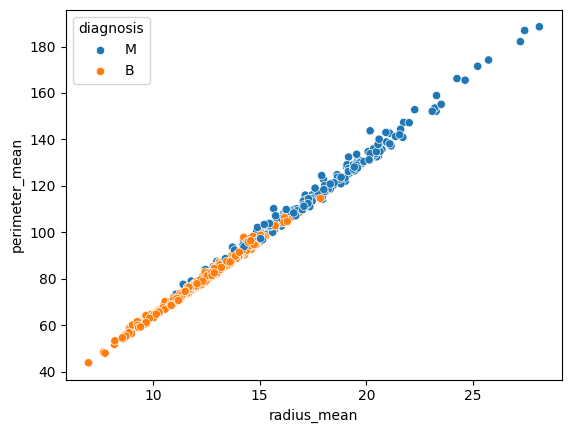

In [22]:
sns.scatterplot(data=df1,x="radius_mean",y="perimeter_mean",hue="diagnosis")

In [23]:
min_correlation = correlation_pairs.loc[correlation_pairs['Correlation_Value'].idxmin()]
print("Lowest Correlation:")
print(min_correlation)

Lowest Correlation:
Feature_1            area_mean
Feature_2              area_se
Correlation_Value     0.800086
Correlation_Type      Positive
Name: 16, dtype: object


<Axes: xlabel='area_mean', ylabel='area_se'>

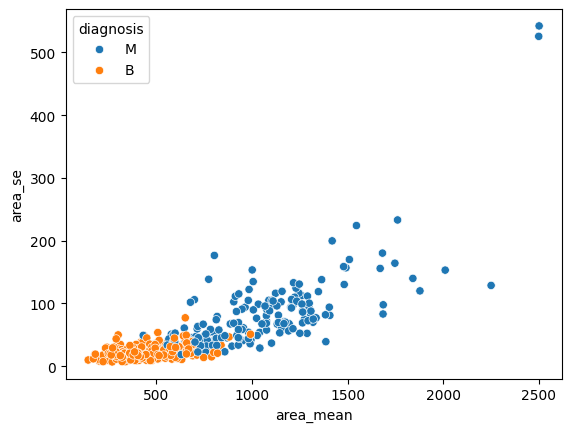

In [24]:
sns.scatterplot(data=df1,x="area_mean",y="area_se",hue="diagnosis")

In [25]:
min_max_corr = correlation_pairs.groupby('Feature_1')['Correlation_Value'].agg(['min', 'max'])

print("Minimum and Maximum Correlation Value for each Feature_1:")
print(min_max_corr)

Minimum and Maximum Correlation Value for each Feature_1:
                              min       max
Feature_1                                  
area_mean                0.800086  0.987357
area_se                  0.800086  0.951830
area_worst               0.809630  0.984015
compactness_mean         0.815573  0.883121
compactness_se           0.801268  0.803269
compactness_worst        0.801080  0.892261
concave points_mean      0.809630  0.921391
concave points_worst     0.801080  0.910155
concavity_mean           0.861323  0.921391
concavity_se             0.801268  0.801268
concavity_worst          0.816275  0.892261
fractal_dimension_se     0.803269  0.803269
fractal_dimension_worst  0.810455  0.810455
perimeter_mean           0.850977  0.997855
perimeter_se             0.937655  0.972794
perimeter_worst          0.816322  0.993708
radius_mean              0.822529  0.997855
radius_se                0.951830  0.972794
radius_worst             0.830318  0.993708
smoothness_mean   

In [26]:
min_max_corr = correlation_pairs.groupby(['Feature_1',"Feature_2"])['Correlation_Value'].agg(['max'])

print("Minimum and Maximum Correlation Value for each Feature_1:")
min_max_corr

Minimum and Maximum Correlation Value for each Feature_1:


max
Feature_1        Feature_2                    
area_mean        area_se              0.800086
                 area_worst           0.959213
                 concave points_mean  0.823269
                 perimeter_mean       0.986507
                 perimeter_worst      0.959120
...                                        ...
radius_worst     radius_mean          0.969539
smoothness_mean  smoothness_worst     0.805324
smoothness_worst smoothness_mean      0.805324
texture_mean     texture_worst        0.912045
texture_worst    texture_mean         0.912045

[88 rows x 1 columns]

In [27]:
min_max_corr.shape

(88, 1)

In [28]:
specific_feature = 'area_mean'
filtered_df = correlation_pairs[correlation_pairs['Feature_1'] == specific_feature][['Feature_2', 'Correlation_Value']]
filtered_df

,Feature_2,Correlation_Value
13,radius_mean,0.987357
14,perimeter_mean,0.986507
15,concave points_mean,0.823269
16,area_se,0.800086
17,radius_worst,0.962746
18,perimeter_worst,0.959120
19,area_worst,0.959213


In [29]:
for specific_feature in correlation_pairs["Feature_1"].unique():
    filtered_df = correlation_pairs[correlation_pairs['Feature_1'] == specific_feature][['Feature_2', 'Correlation_Value']]
    print(f"Feature_1: {specific_feature} and its related Feature_2 and Correlation_Value:")
    print(filtered_df)
    print("\n") 

Feature_1: radius_mean and its related Feature_2 and Correlation_Value:
             Feature_2  Correlation_Value
0       perimeter_mean           0.997855
1            area_mean           0.987357
2  concave points_mean           0.822529
3         radius_worst           0.969539
4      perimeter_worst           0.965137
5           area_worst           0.941082


Feature_1: texture_mean and its related Feature_2 and Correlation_Value:
       Feature_2  Correlation_Value
6  texture_worst           0.912045


Feature_1: perimeter_mean and its related Feature_2 and Correlation_Value:
              Feature_2  Correlation_Value
7           radius_mean           0.997855
8             area_mean           0.986507
9   concave points_mean           0.850977
10         radius_worst           0.969476
11      perimeter_worst           0.970387
12           area_worst           0.941550


Feature_1: area_mean and its related Feature_2 and Correlation_Value:
              Feature_2  Correlation_

<table border="1" cellpadding="5" cellspacing="0">
    <thead>
        <tr>
            <th>Feature_1</th>
            <th>Feature_2</th>
            <th>Correlation Value</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>radius_mean</td>
            <td>perimeter_mean</td>
            <td>0.997855</td>
        </tr>
        <tr>
            <td>radius_mean</td>
            <td>area_mean</td>
            <td>0.987357</td>
        </tr>
        <tr>
            <td>texture_mean</td>
            <td>texture_worst</td>
            <td>0.912045</td>
        </tr>
        <tr>
            <td>perimeter_mean</td>
            <td>radius_mean</td>
            <td>0.997855</td>
        </tr>
        <tr>
            <td>perimeter_mean</td>
            <td>area_mean</td>
            <td>0.986507</td>
        </tr>
        <tr>
            <td>area_mean</td>
            <td>radius_mean</td>
            <td>0.987357</td>
        </tr>
        <tr>
            <td>area_mean</td>
            <td>perimeter_mean</td>
            <td>0.986507</td>
        </tr>
        <tr>
            <td>smoothness_mean</td>
            <td>smoothness_worst</td>
            <td>0.805324</td>
        </tr>
        <tr>
            <td>compactness_mean</td>
            <td>concavity_mean</td>
            <td>0.883121</td>
        </tr>
        <tr>
            <td>concavity_mean</td>
            <td>compactness_mean</td>
            <td>0.883121</td>
        </tr>
        <tr>
            <td>concave points_mean</td>
            <td>concavity_mean</td>
            <td>0.921391</td>
        </tr>
        <tr>
            <td>radius_worst</td>
            <td>radius_mean</td>
            <td>0.969539</td>
        </tr>
        <tr>
            <td>texture_worst</td>
            <td>texture_mean</td>
            <td>0.912045</td>
        </tr>
        <!-- Add more rows as needed -->
    </tbody>
</table>
<h2>Summary</h2>
<p>
    The report highlights significant correlations among features in the dataset. For example, 
    <strong>radius_mean</strong> is highly correlated with <strong>perimeter_mean</strong> (0.998) and 
    <strong>area_mean</strong> (0.987), while <strong>texture_mean</strong> strongly correlates with 
    <strong>texture_worst</strong> (0.912). Similarly, <strong>compactness_mean</strong> shows a high 
    correlation with <strong>concavity_mean</strong> (0.883) and <strong>concave points_mean</strong> (0.831). 
    This pattern is consistent across various features, indicating strong relationships that could influence 
    model predictions. Below is a tabular representation of the most relevant feature correlations.
</p>


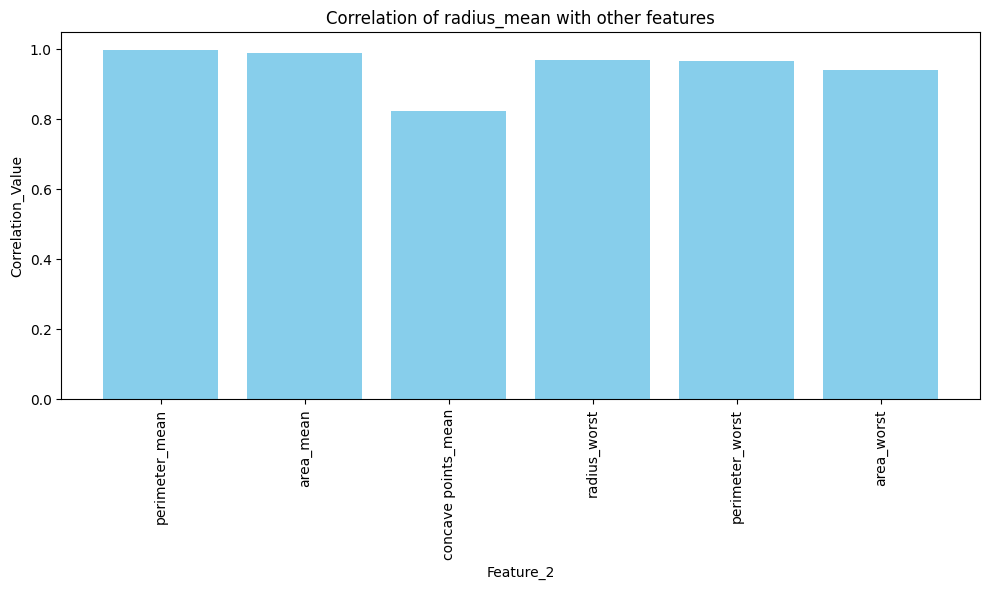

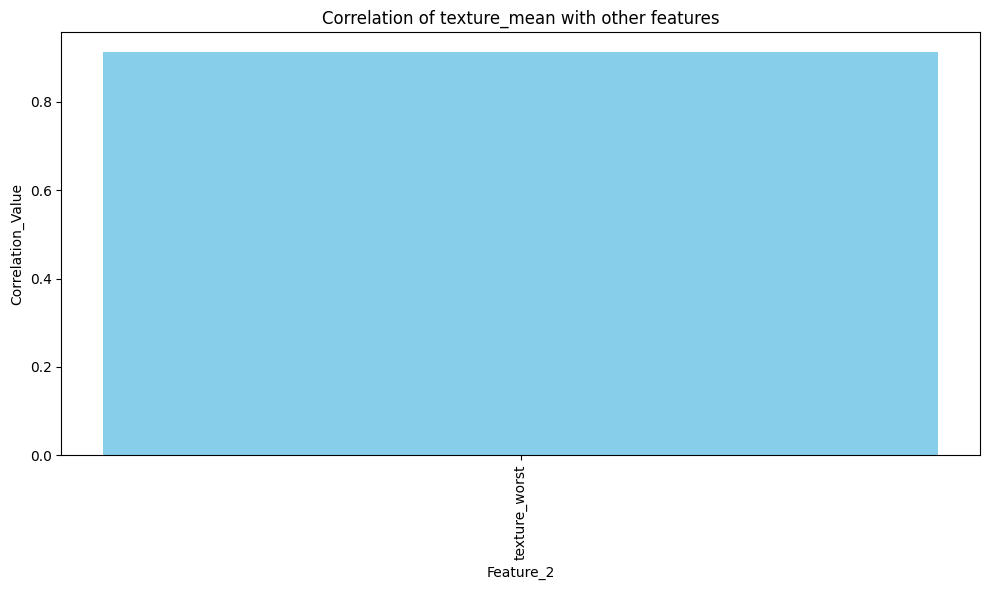

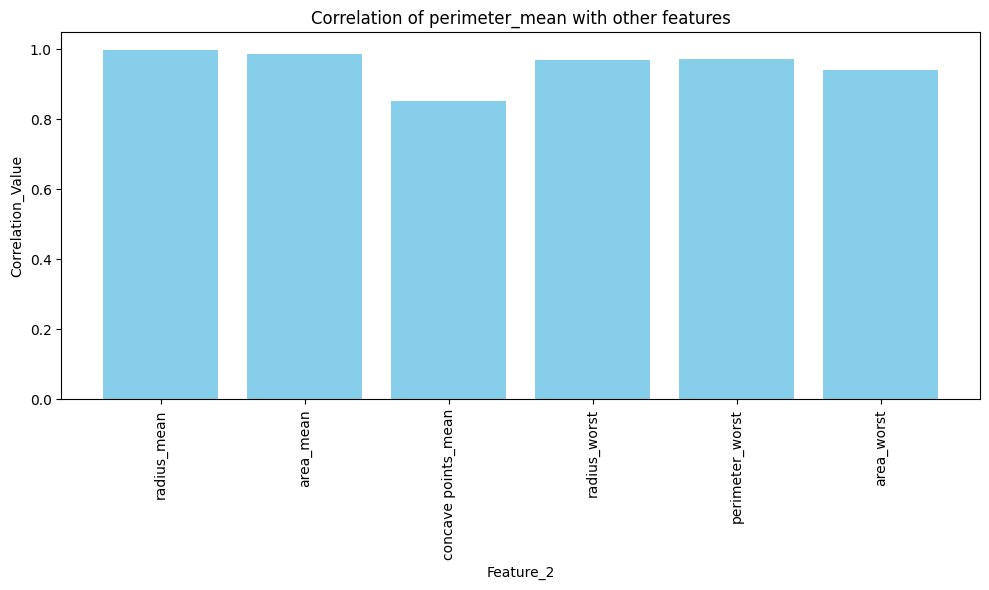

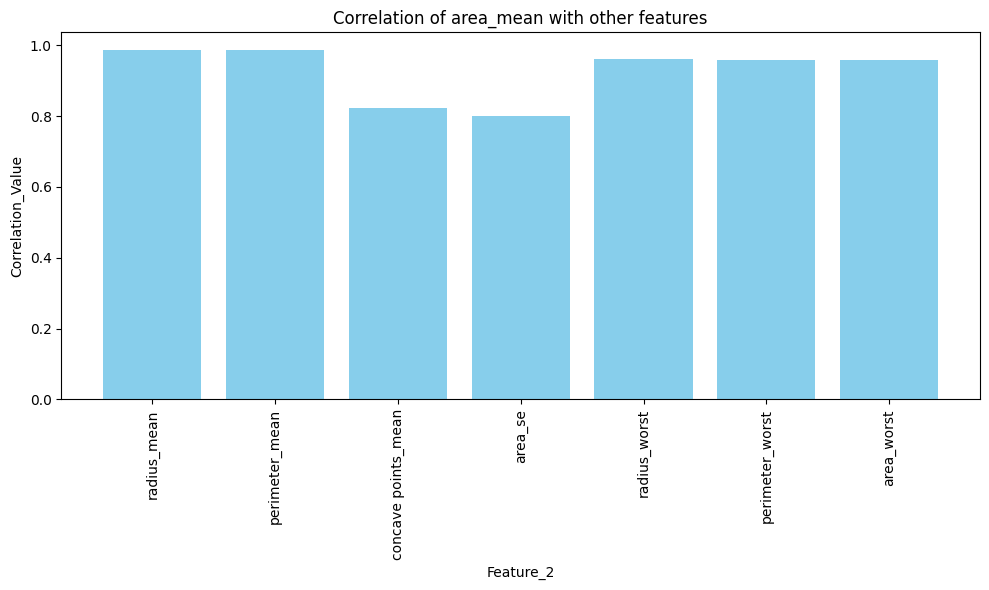

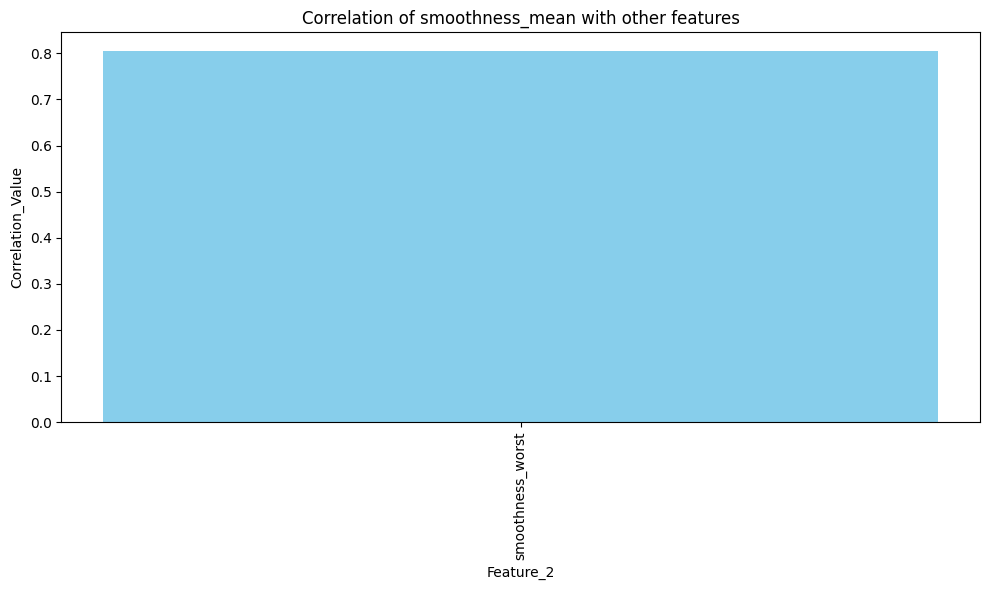

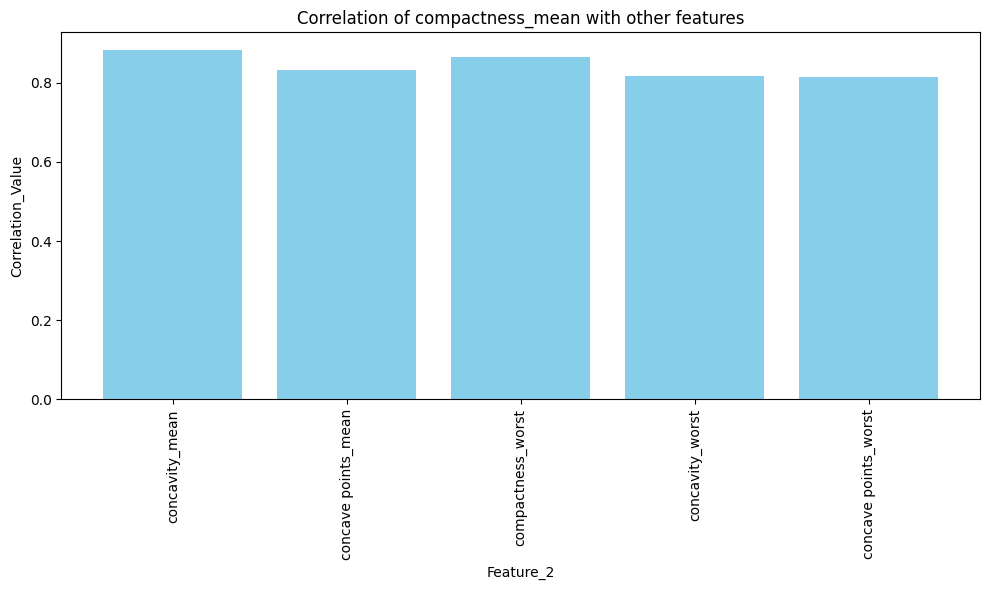

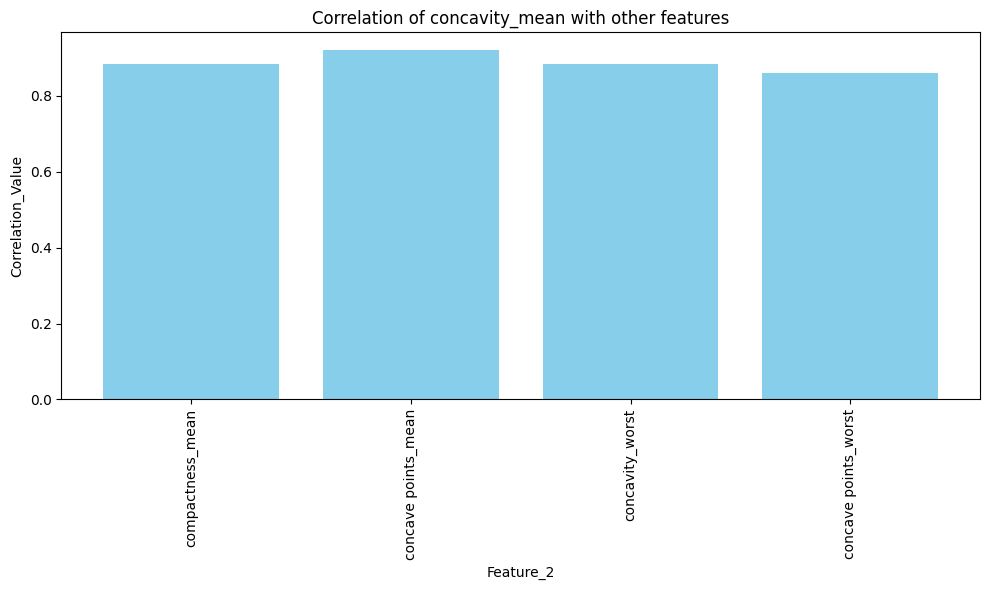

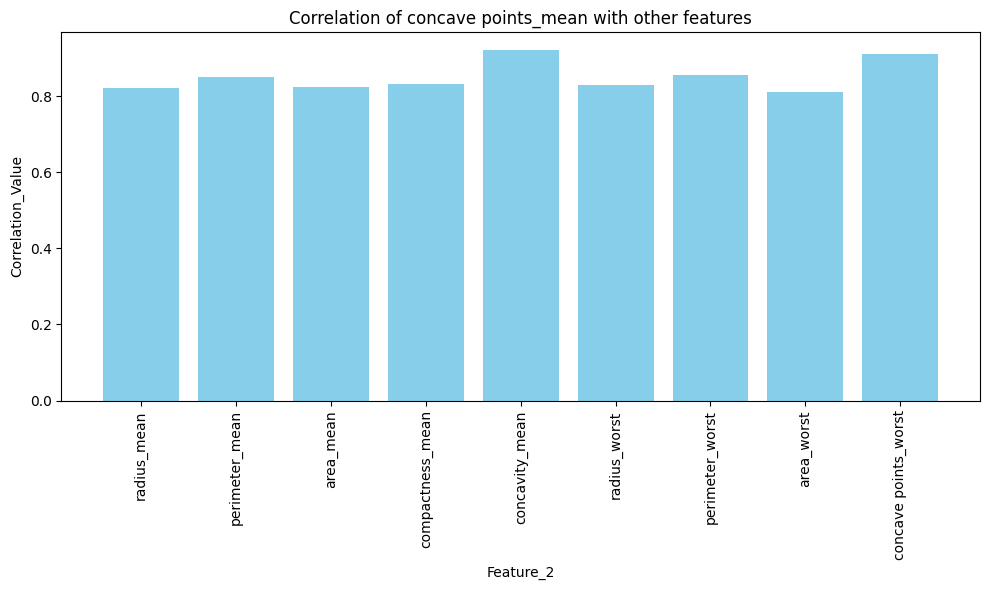

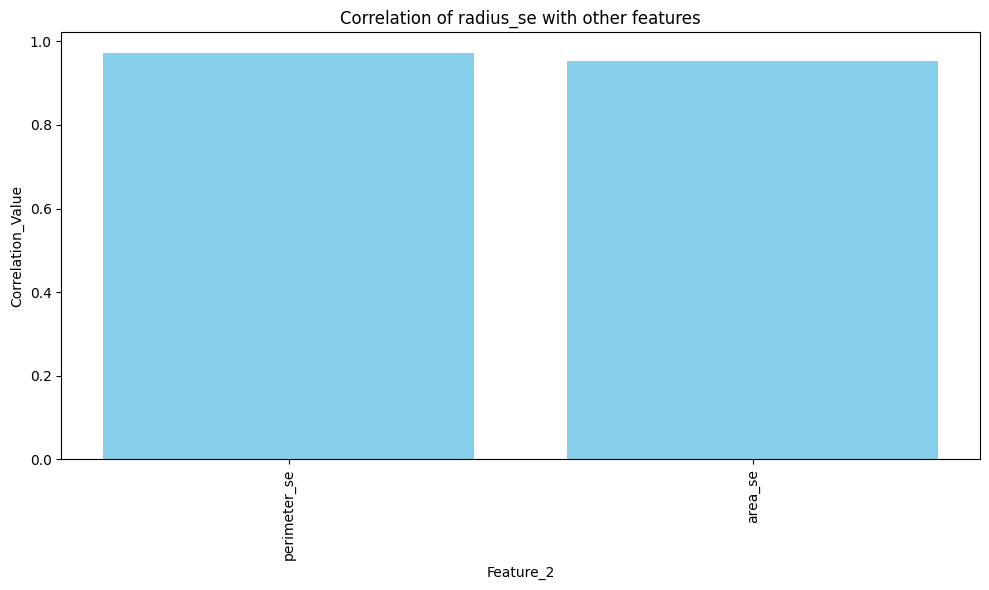

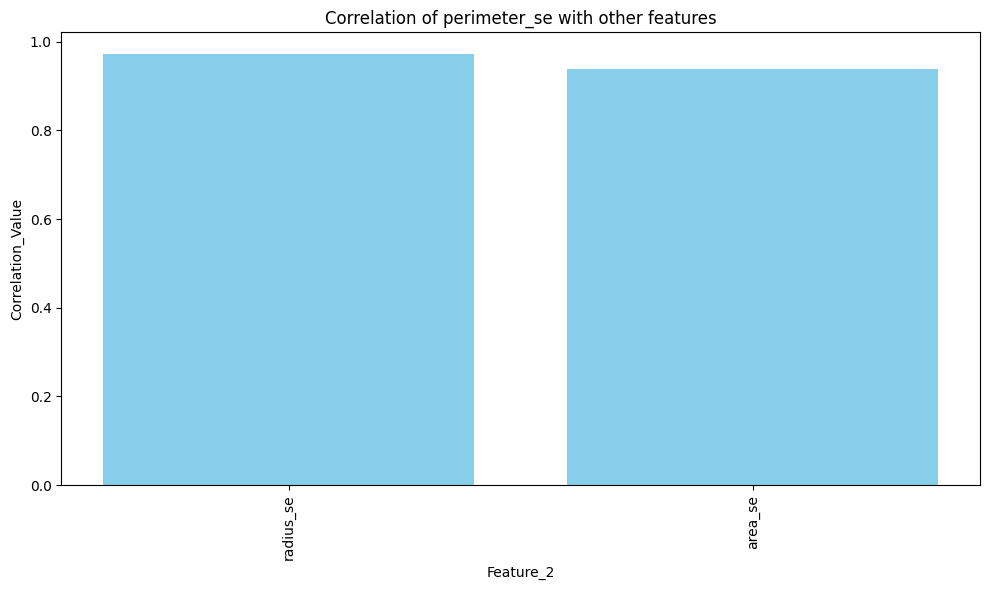

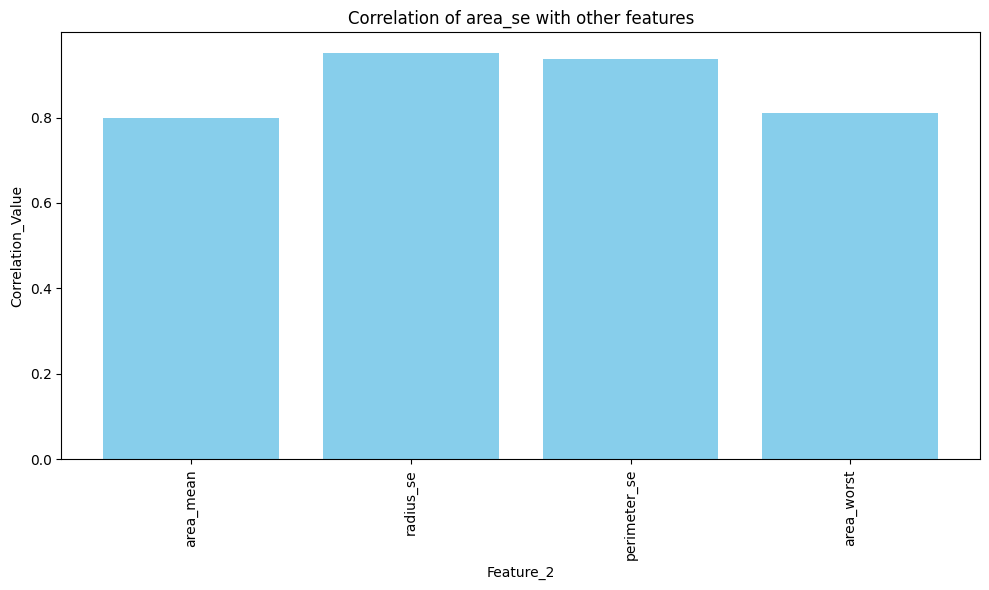

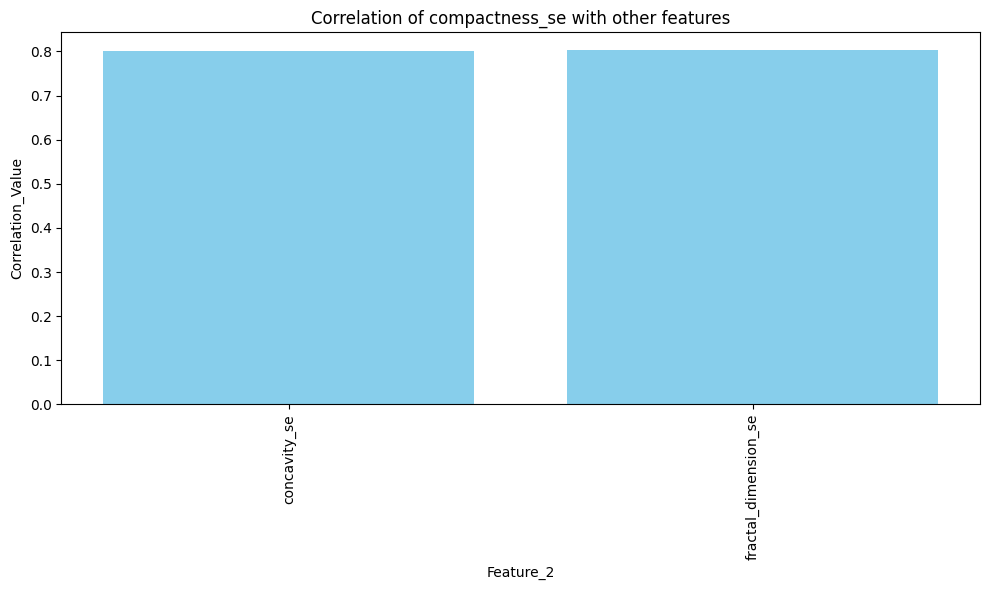

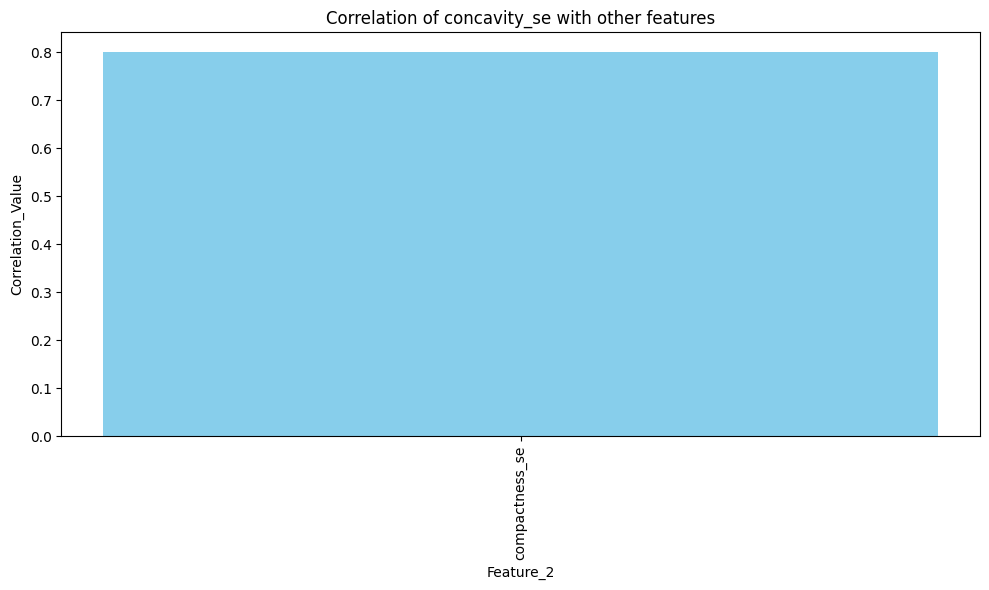

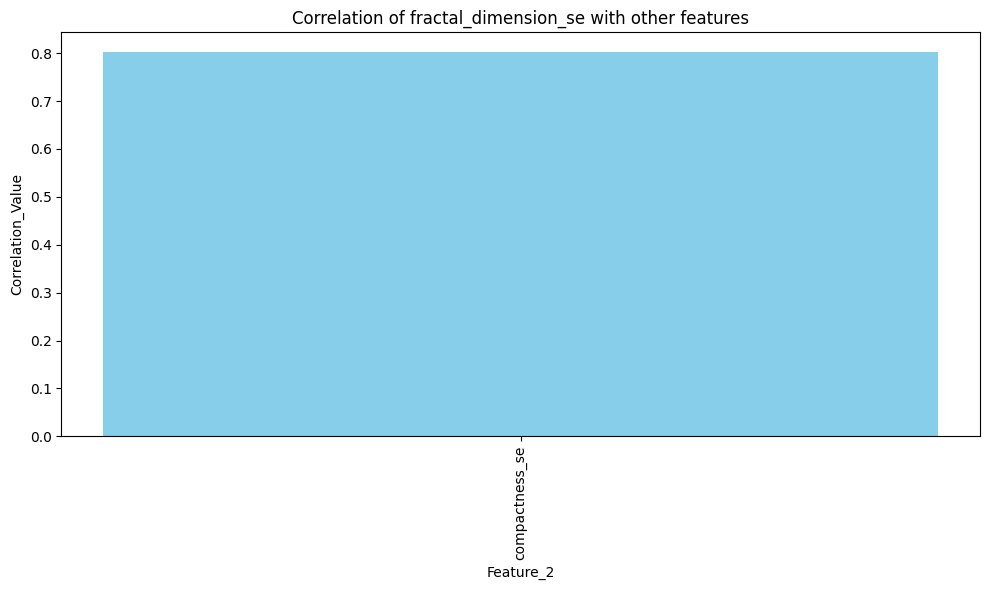

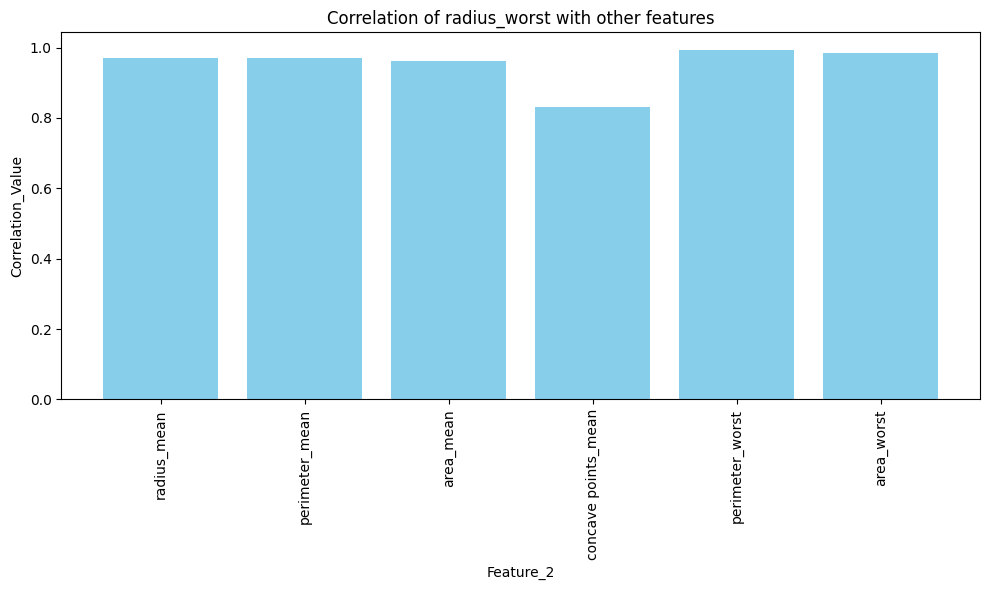

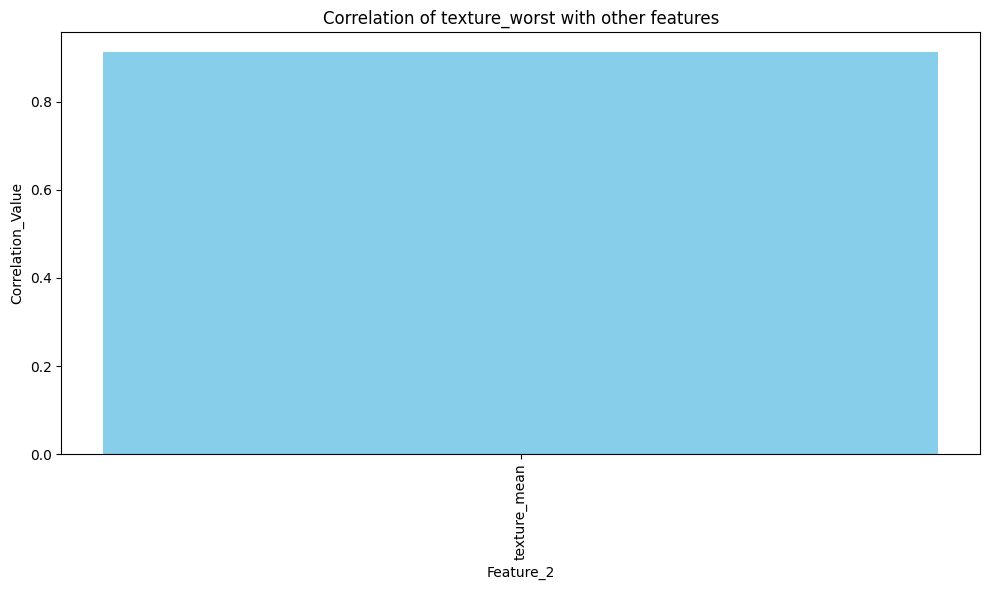

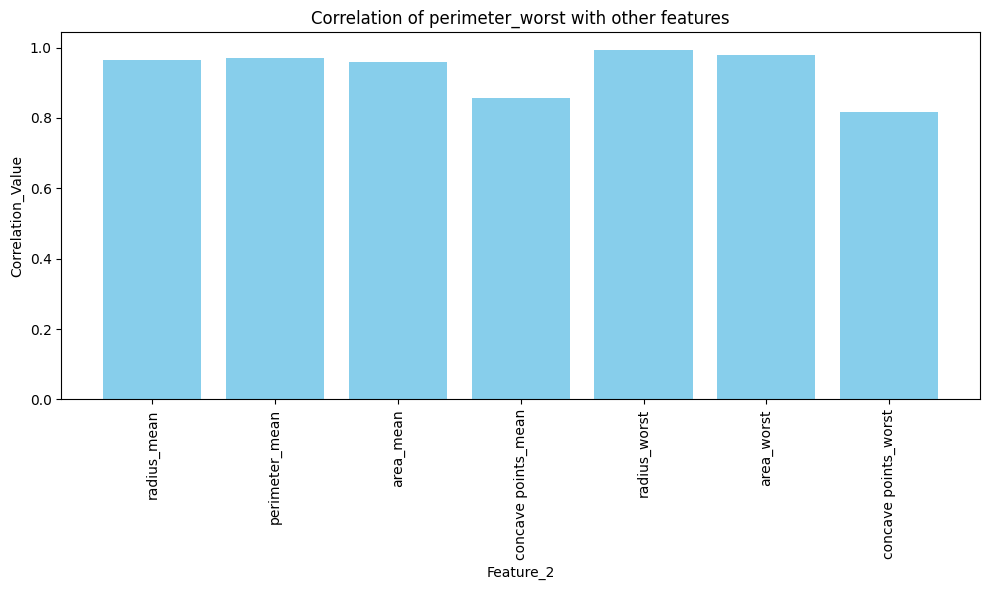

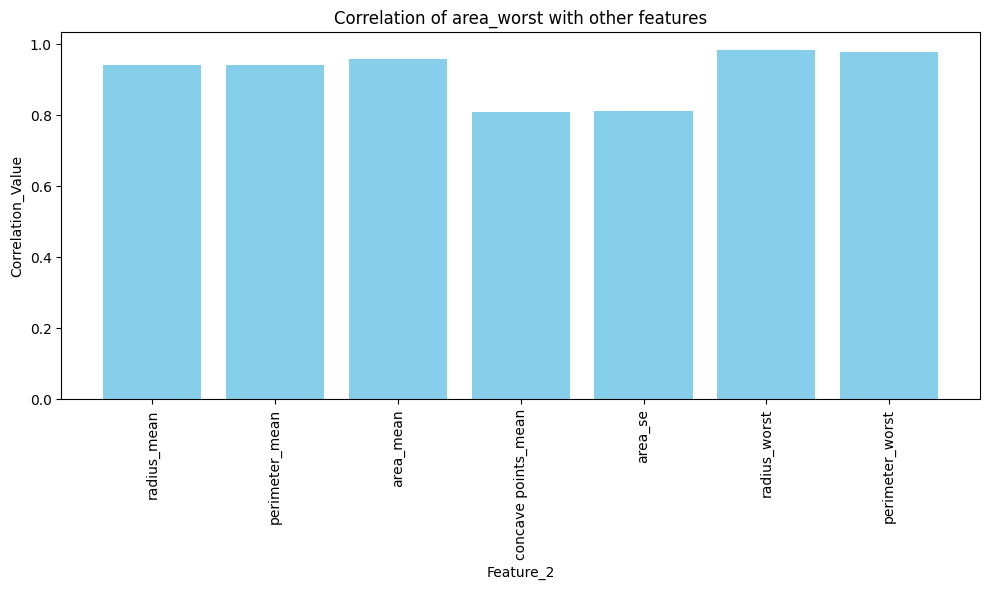

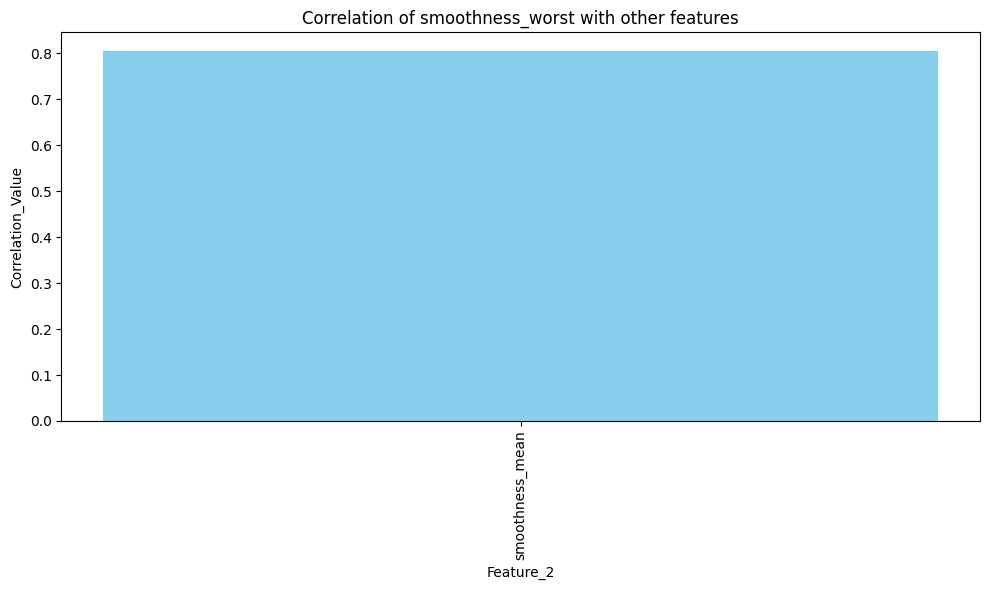

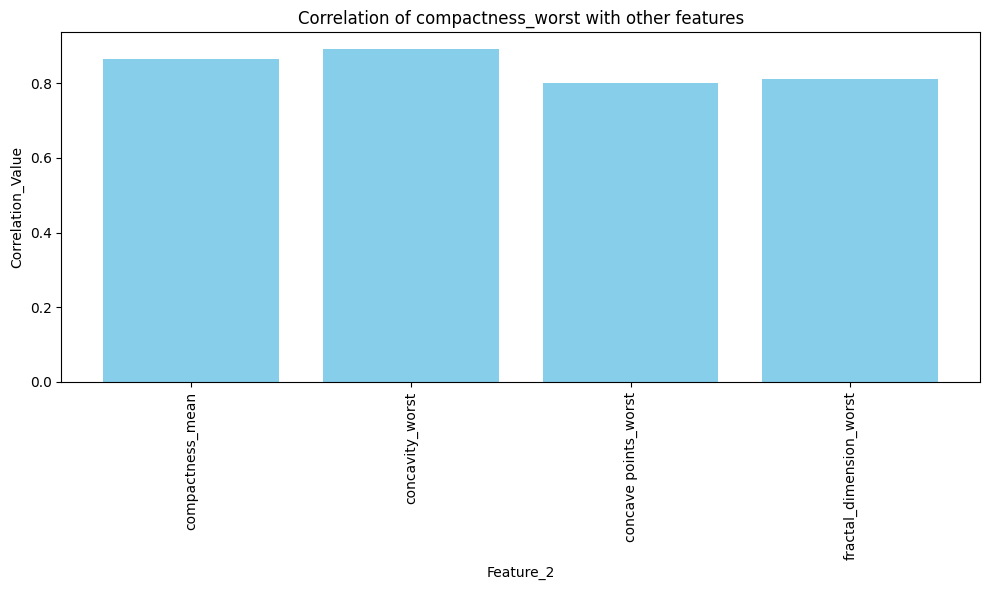

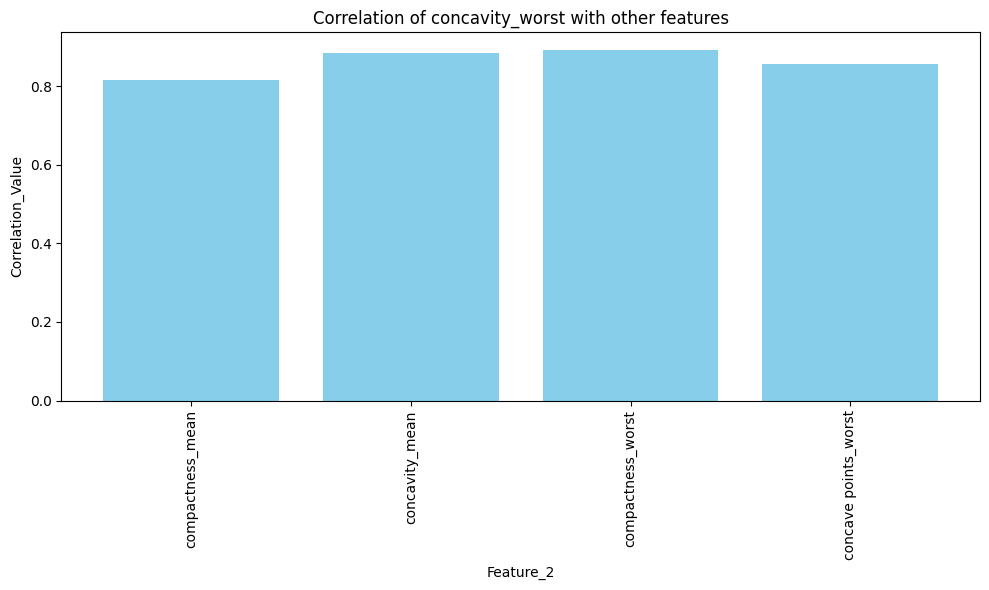

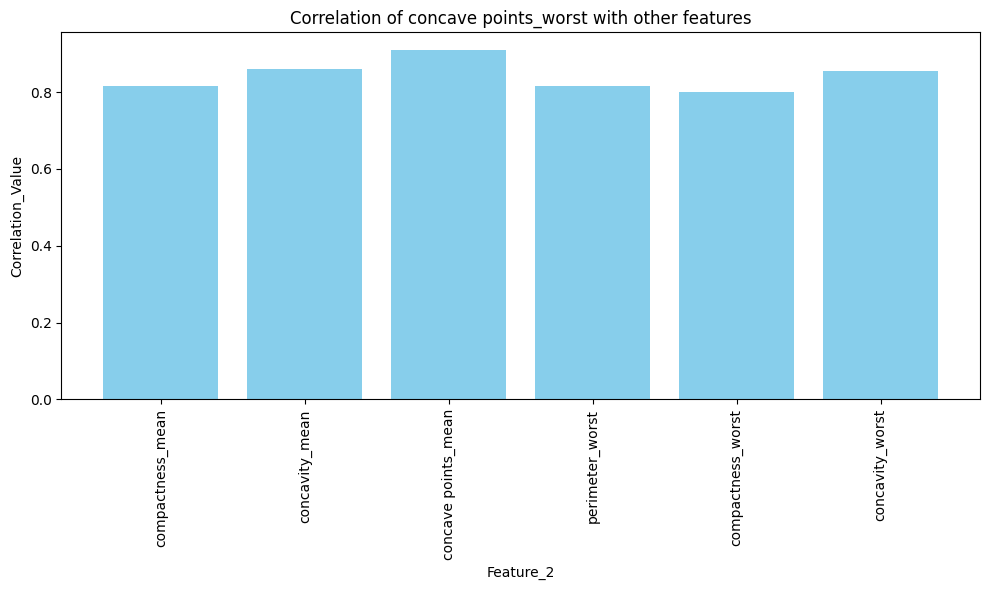

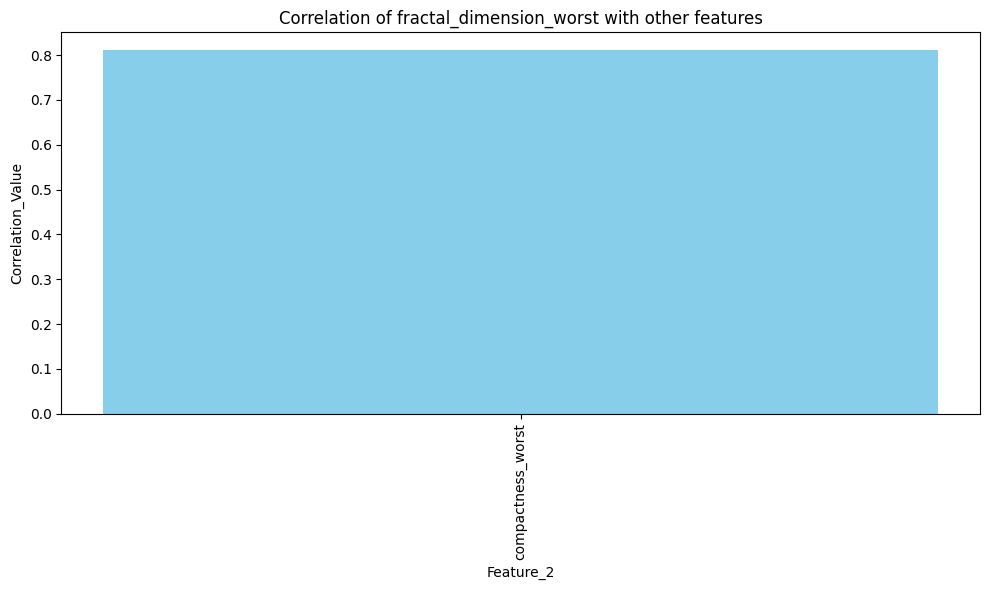

In [30]:
import matplotlib.pyplot as plt

# Loop through all unique Feature_1 values
for specific_feature in correlation_pairs["Feature_1"].unique():
    filtered_df = correlation_pairs[correlation_pairs['Feature_1'] == specific_feature]
    
    # Create a bar plot for each Feature_1
    plt.figure(figsize=(10, 6))
    plt.bar(filtered_df['Feature_2'], filtered_df['Correlation_Value'], color='skyblue')
    plt.xlabel('Feature_2')
    plt.ylabel('Correlation_Value')
    plt.title(f'Correlation of {specific_feature} with other features')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()


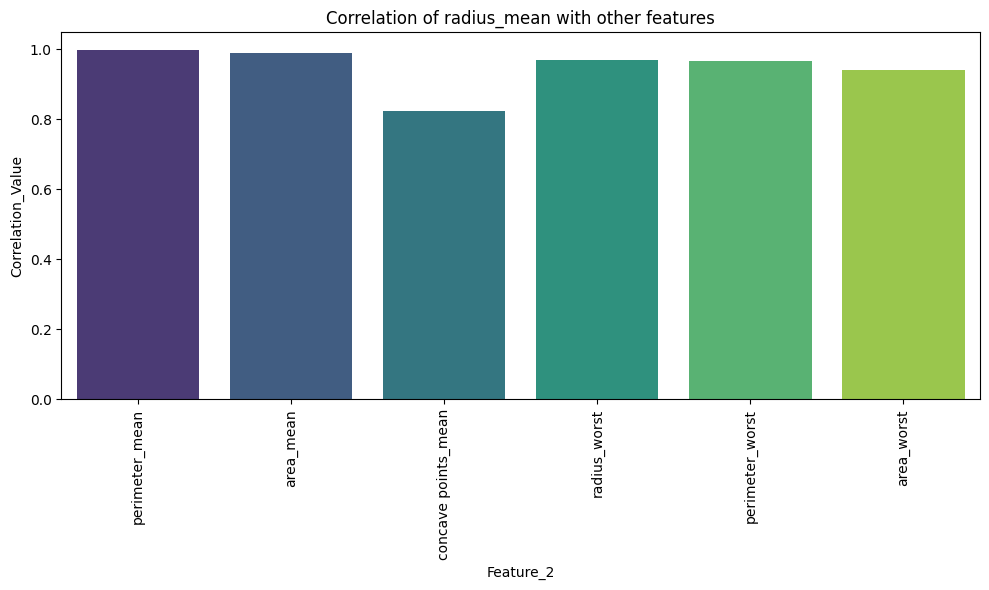

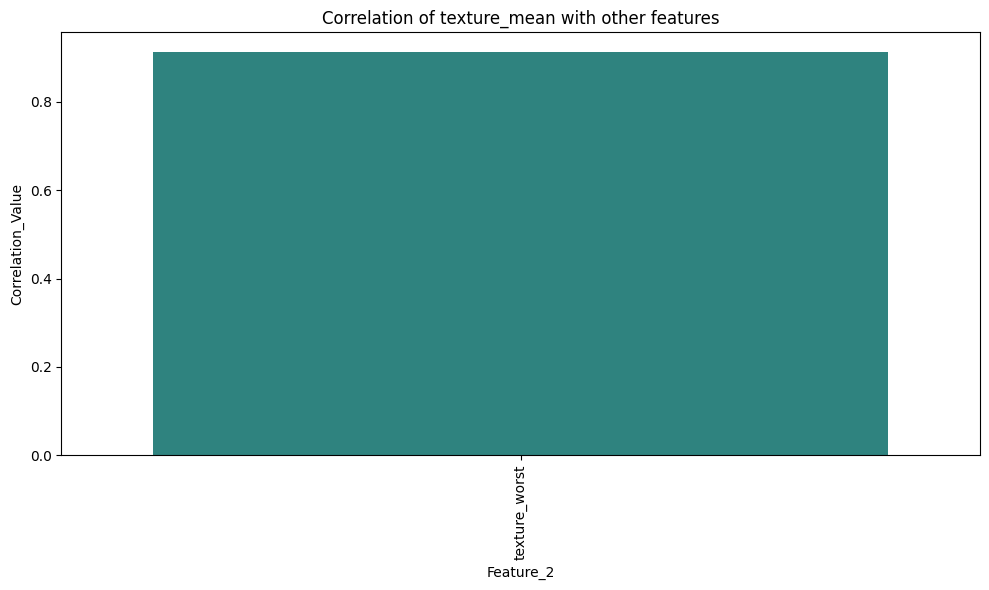

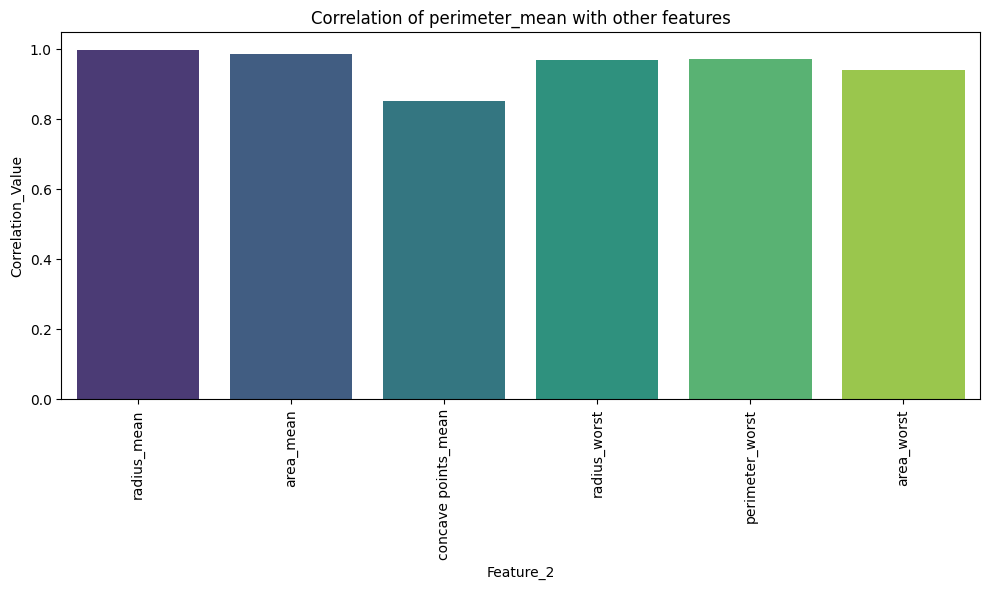

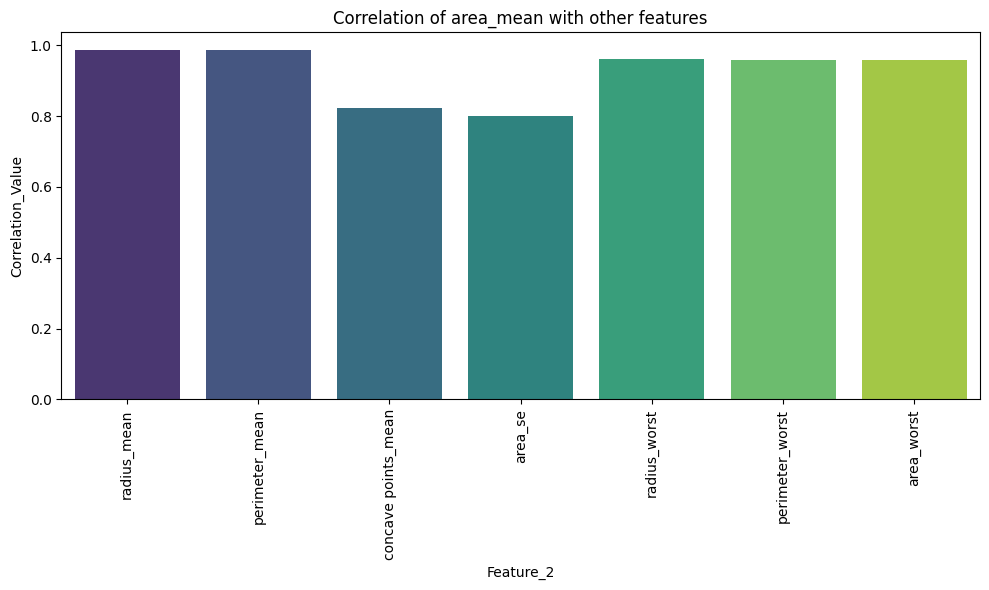

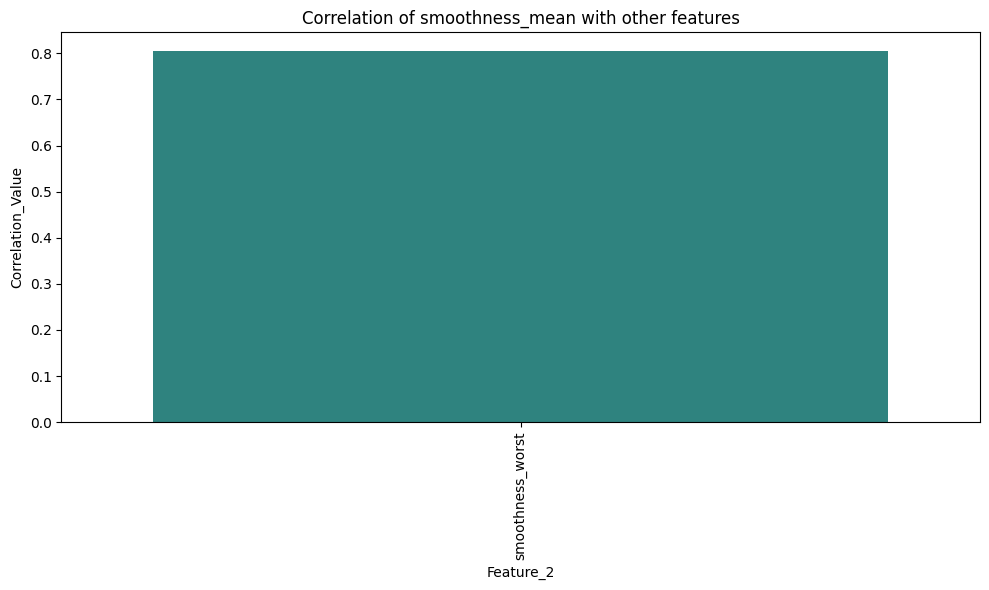

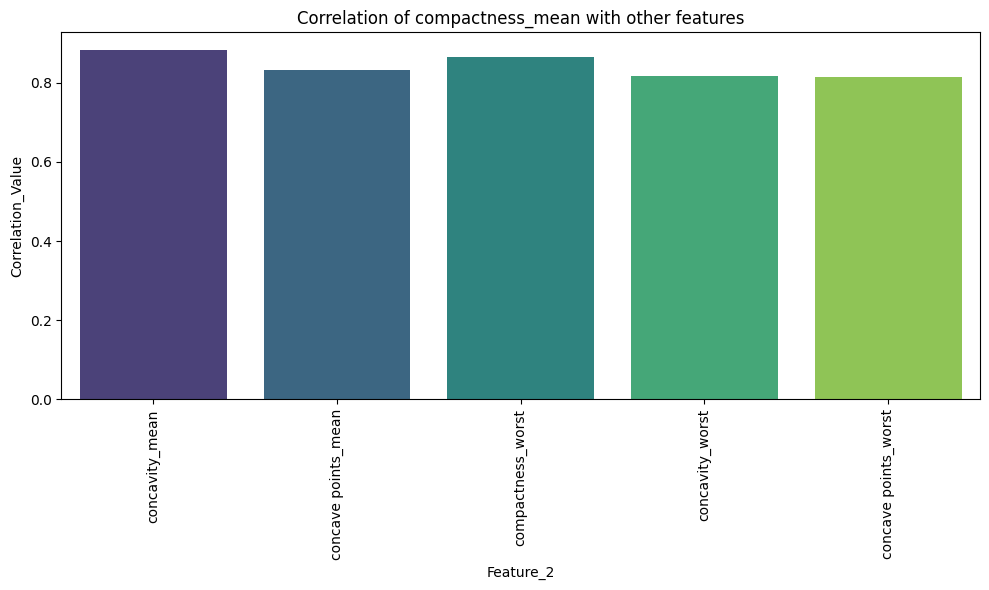

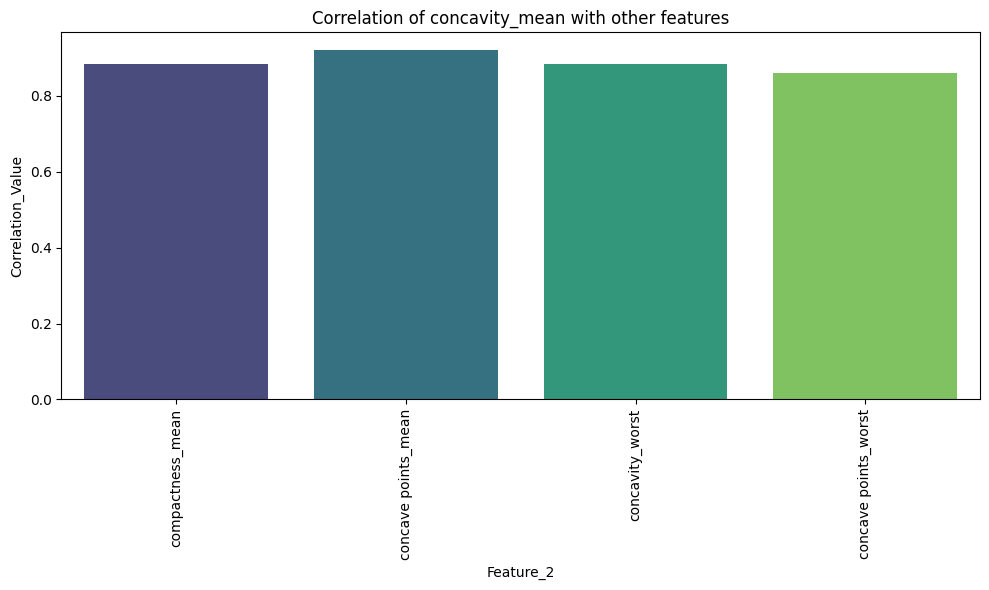

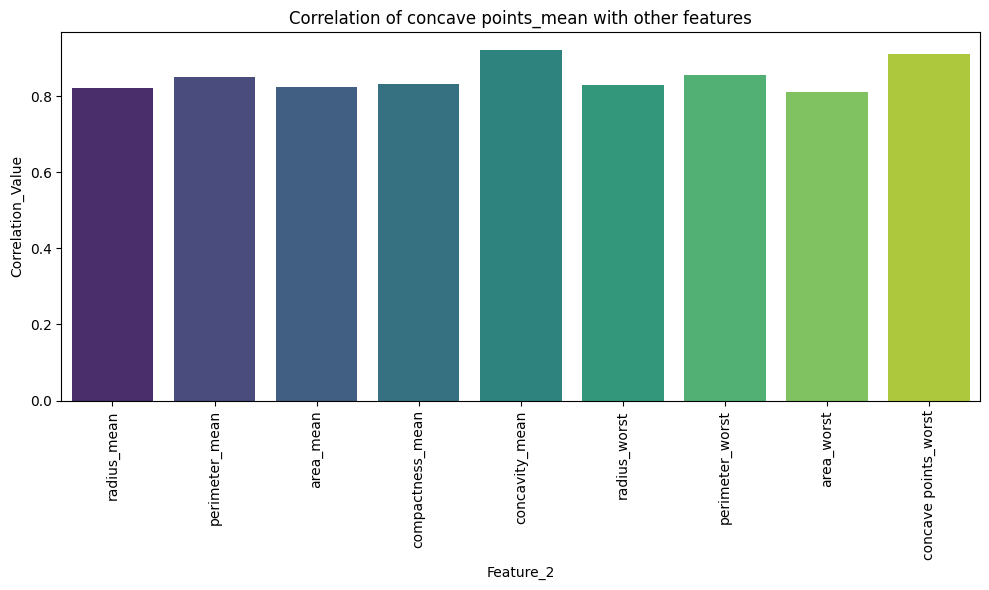

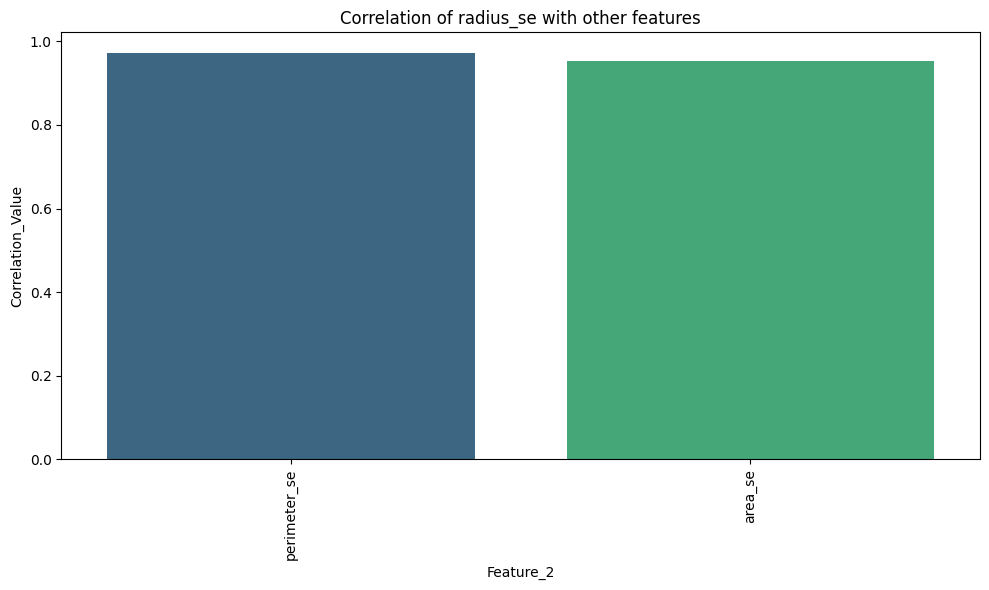

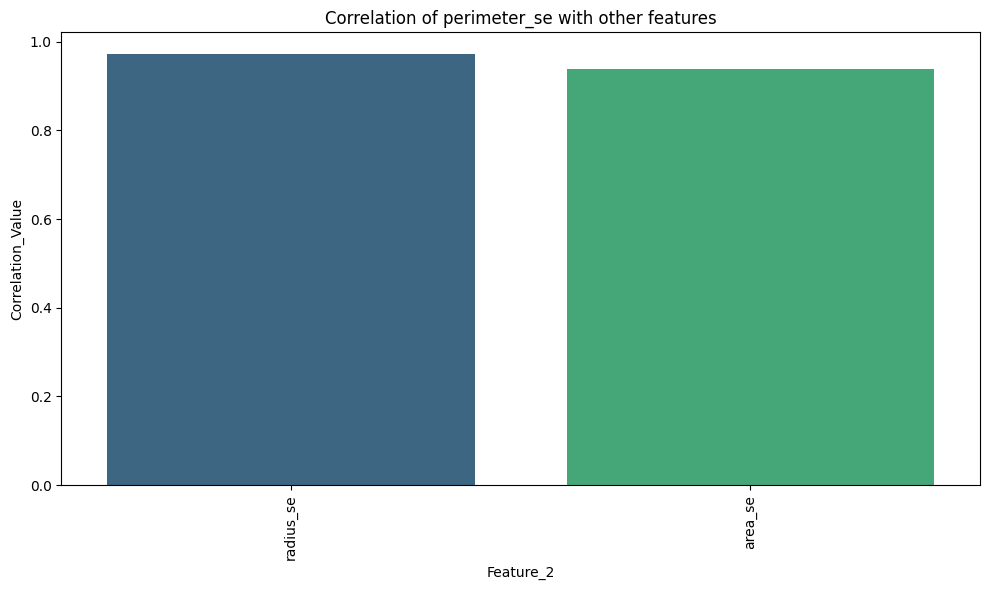

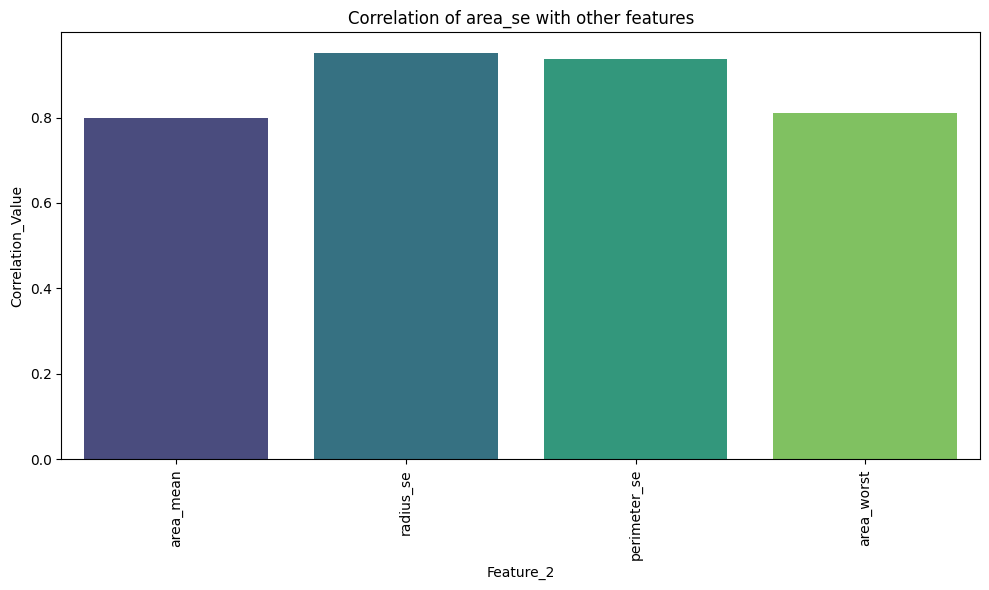

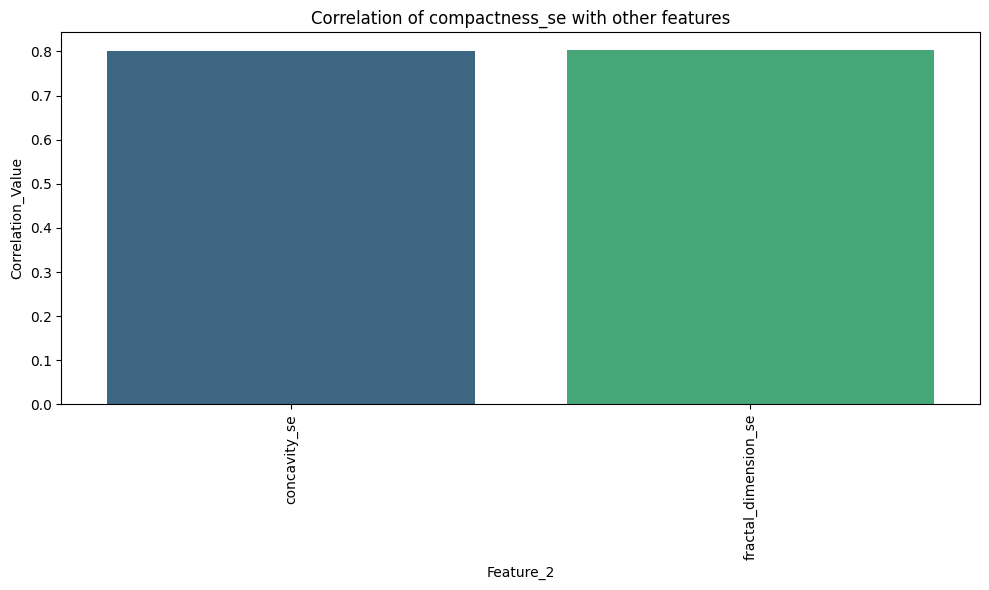

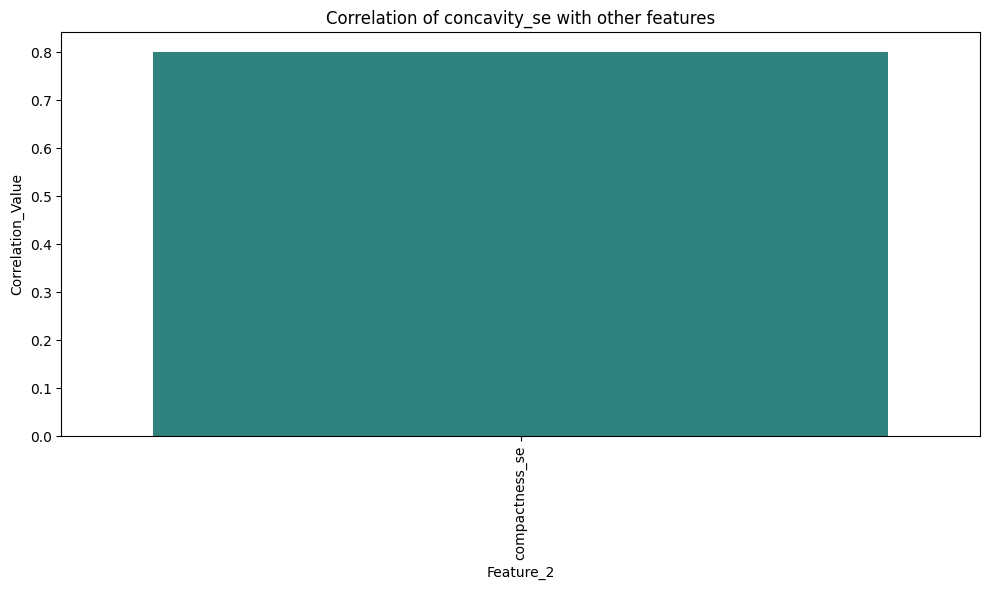

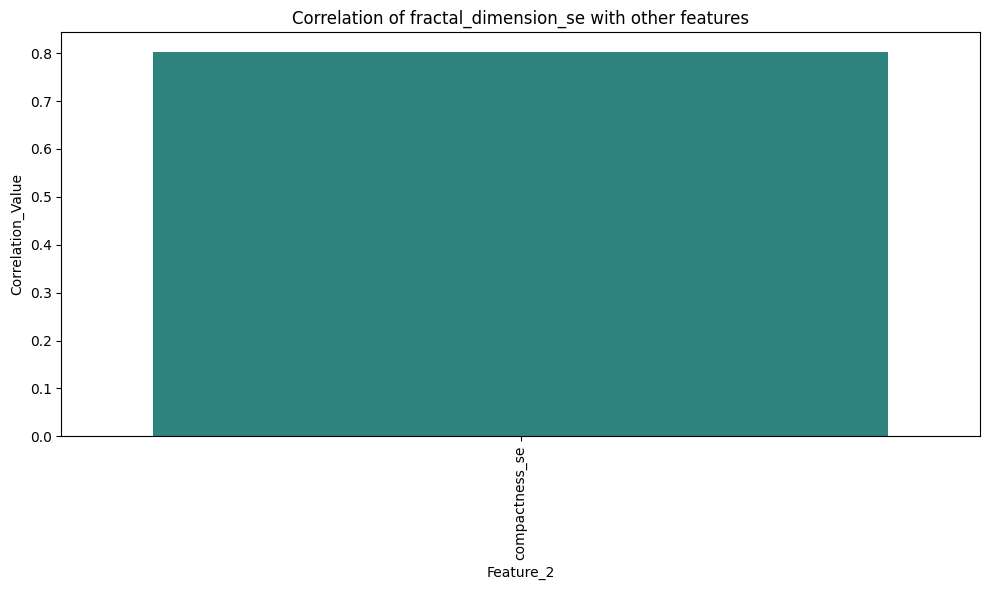

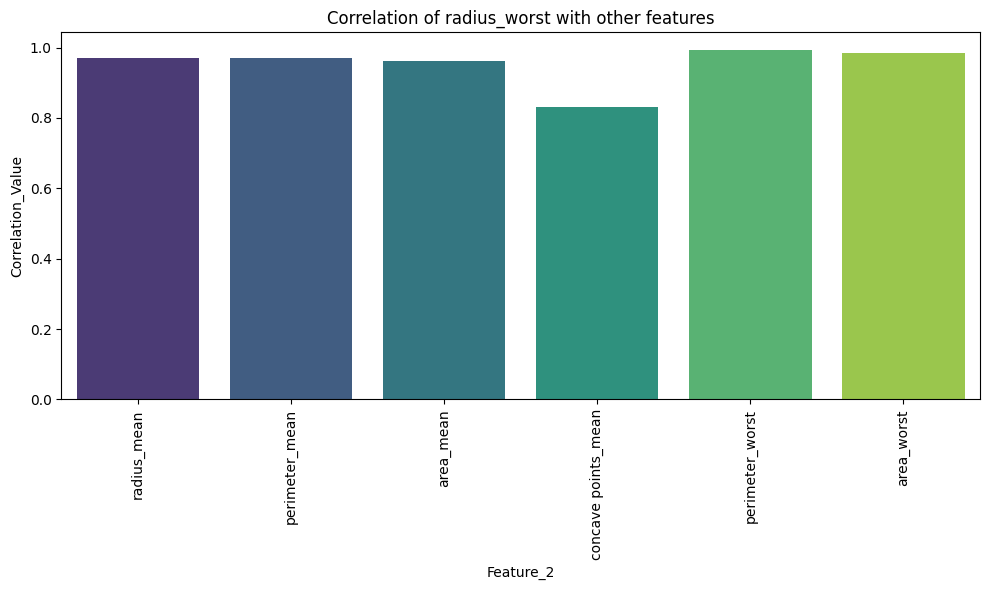

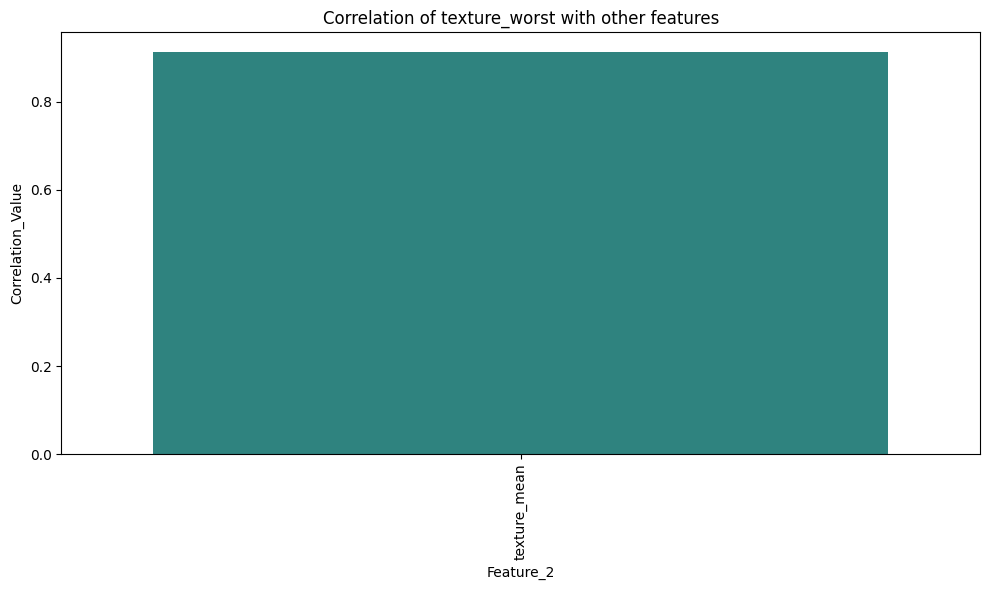

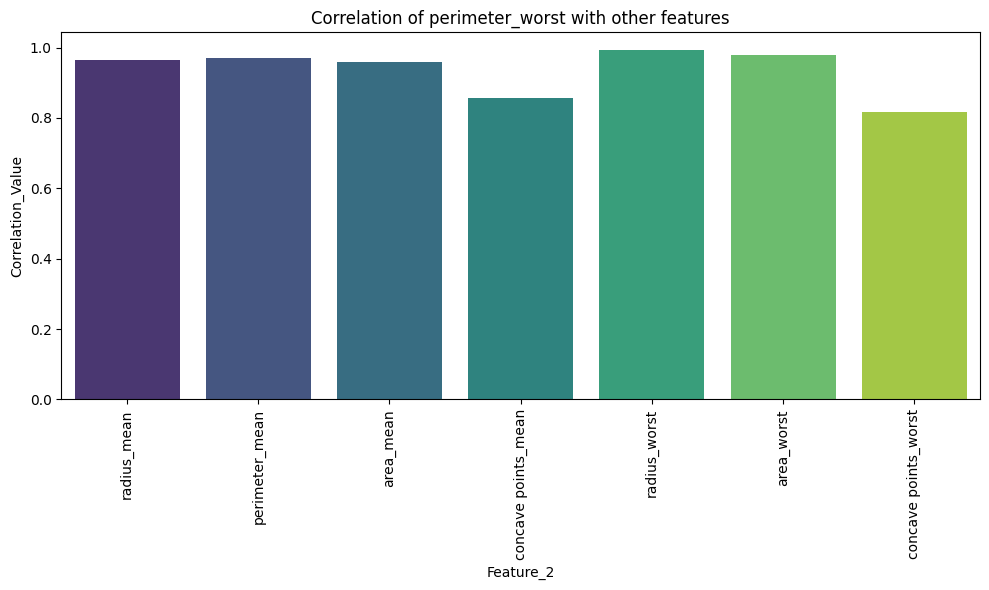

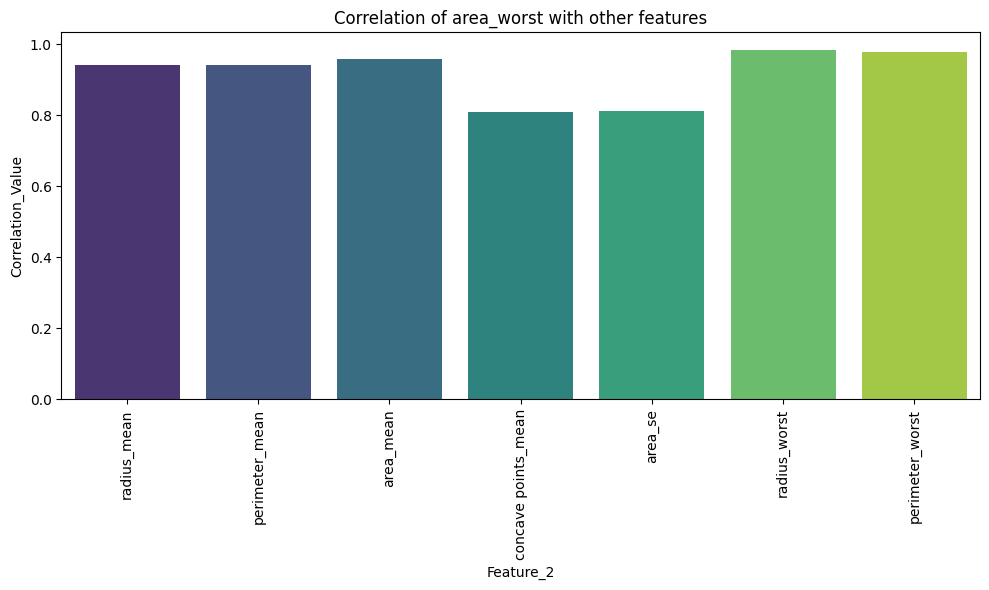

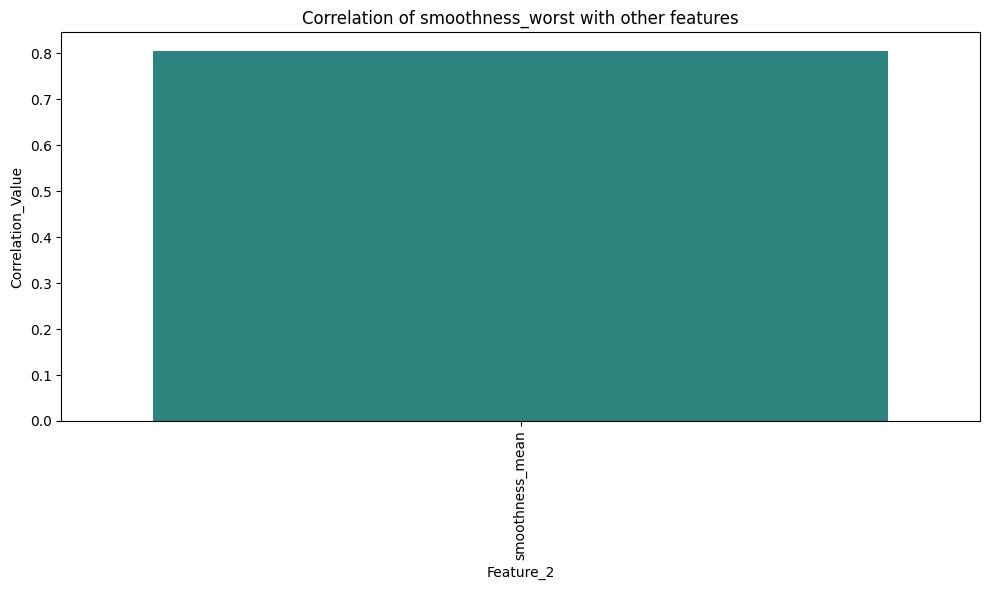

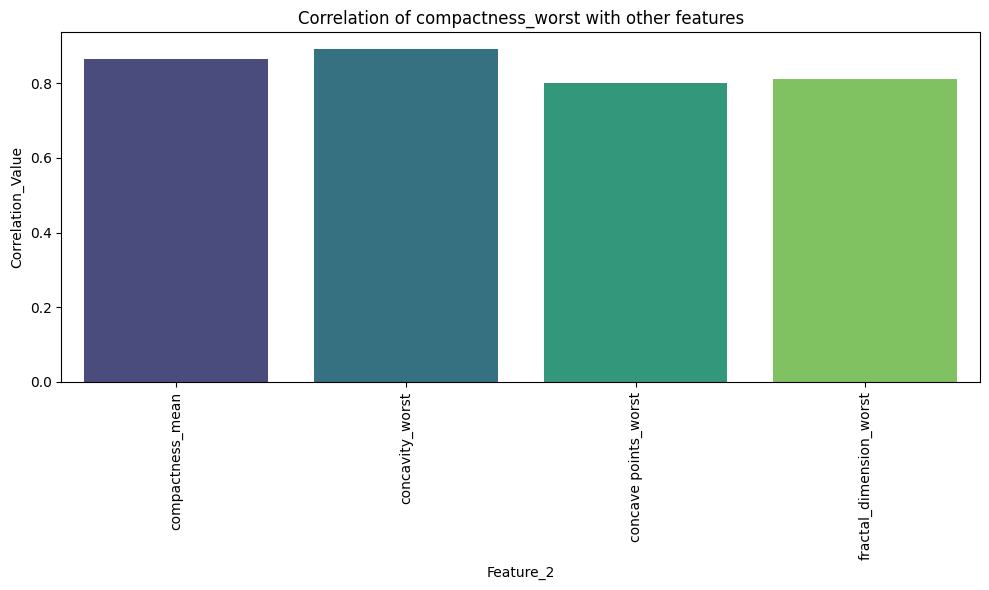

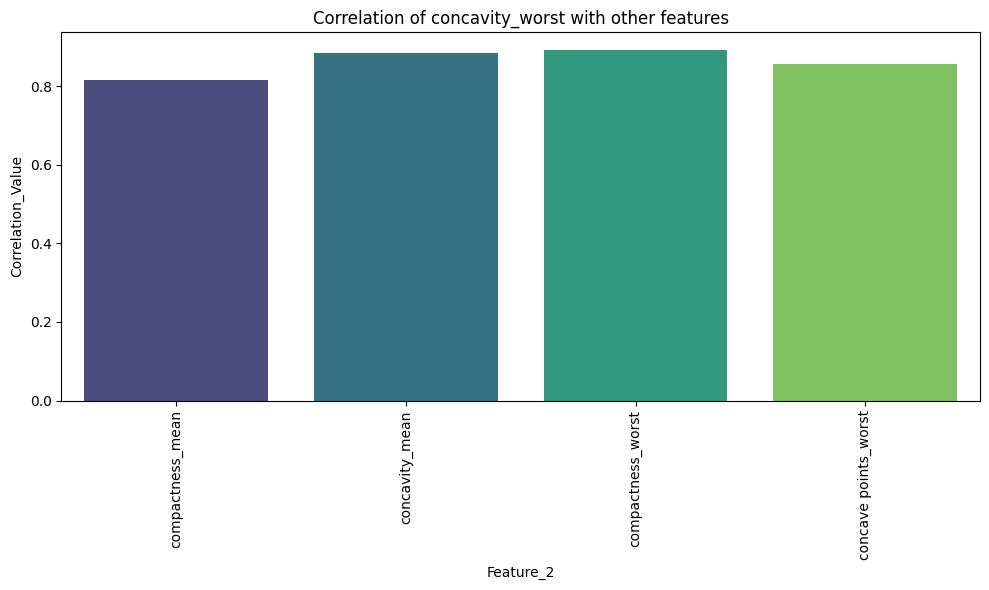

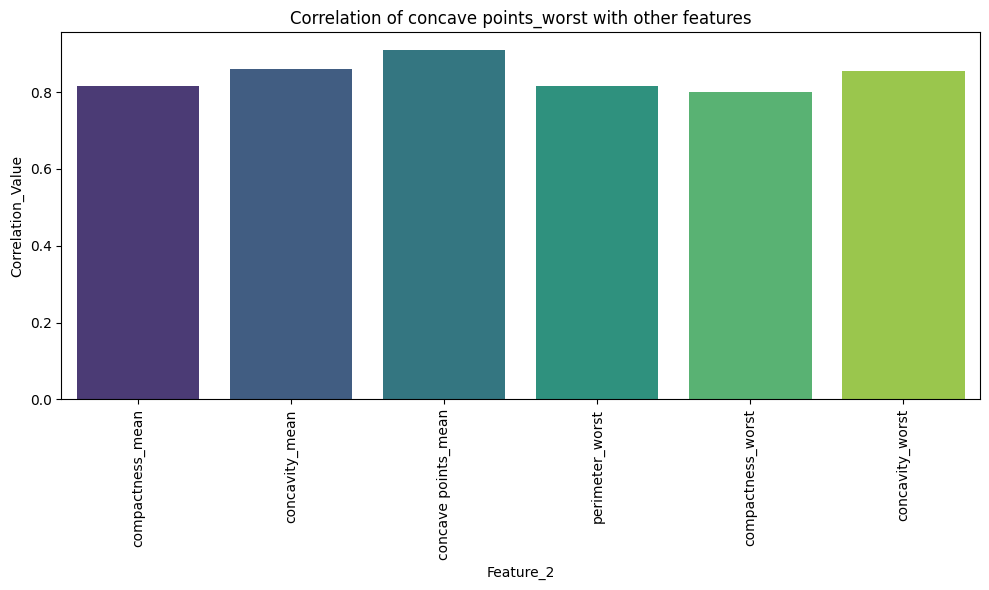

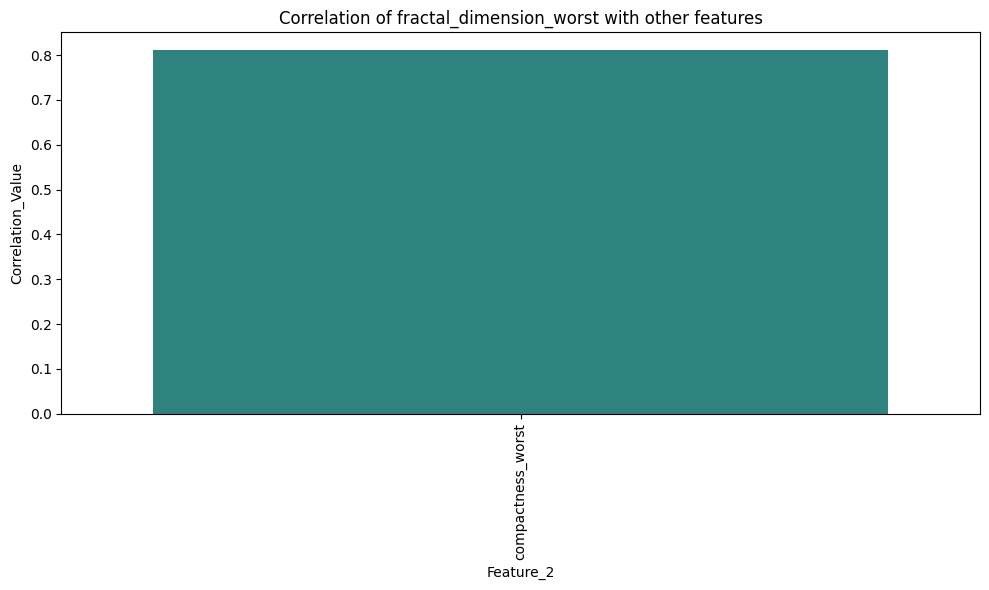

In [31]:
for specific_feature in correlation_pairs["Feature_1"].unique():
    filtered_df = correlation_pairs[correlation_pairs['Feature_1'] == specific_feature]
    
    # Create a bar plot using Seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Feature_2', y='Correlation_Value', data=filtered_df, palette='viridis')
    plt.xlabel('Feature_2')
    plt.ylabel('Correlation_Value')
    plt.title(f'Correlation of {specific_feature} with other features')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

In [32]:
grouped = df1.groupby("diagnosis")[num_cols.columns].agg(['min', 'max', 'mean']).reset_index()
grouped

diagnosis radius_mean                   texture_mean                    \
                    min    max       mean          min    max       mean   
0         B       6.981  17.85  12.146524         9.71  33.81  17.914762   
1         M      10.950  28.11  17.462830        10.38  39.28  21.604906   

  perimeter_mean                     ... concavity_worst concave points_worst  \
             min    max        mean  ...            mean                  min   
0          43.79  114.6   78.075406  ...        0.166238              0.00000   
1          71.90  188.5  115.365377  ...        0.450606              0.02899   

                   symmetry_worst                   fractal_dimension_worst  \
     max      mean            min     max      mean                     min   
0  0.175  0.074444         0.1566  0.4228  0.270246                 0.05521   
1  0.291  0.182237         0.1565  0.6638  0.323468                 0.05504   

                     
      max      mean  
0  0.1486  0.079442  
1  0.2075  0.091530  

[2 rows x 91 columns]

In [33]:
grouped.shape

(2, 91)

In [34]:
grouped.columns = ['_'.join(col).strip() if col[1] else col[0] for col in grouped.columns.values]

# Display the result
grouped

,diagnosis,radius_mean_min,radius_mean_max,radius_mean_mean,texture_mean_min,texture_mean_max,texture_mean_mean,perimeter_mean_min,perimeter_mean_max,perimeter_mean_mean,...,concavity_worst_mean,concave points_worst_min,concave points_worst_max,concave points_worst_mean,symmetry_worst_min,symmetry_worst_max,symmetry_worst_mean,fractal_dimension_worst_min,fractal_dimension_worst_max,fractal_dimension_worst_mean
0,B,6.981,17.85,12.146524,9.71,33.81,17.914762,43.79,114.6,78.075406,...,0.166238,0.00000,0.175,0.074444,0.1566,0.4228,0.270246,0.05521,0.1486,0.079442
1,M,10.950,28.11,17.462830,10.38,39.28,21.604906,71.90,188.5,115.365377,...,0.450606,0.02899,0.291,0.182237,0.1565,0.6638,0.323468,0.05504,0.2075,0.091530


In [35]:
'''
for col in num_cols.columns:
    q1 = num_cols[col].quantile(0.25)
    q3 = num_cols[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    
    # Boolean mask to identify outliers
    outliers = (num_cols[col] > upper) | (num_cols[col] < low)
    
    # Calculate total number of outliers
    total_outliers = outliers.sum()
    total = num_cols.shape[0]
    
    # Print the number and percentage of outliers
    print(f"Total Outliers in {col} are: {total_outliers} - {round(100 * (total_outliers / total), 2)}%")
    
    # Filter out the outliers from the DataFrame
    if total_outliers > 0:
        df1 = df1.loc[(df1[col] <= upper) & (df1[col] >= low)]
'''

'\nfor col in num_cols.columns:\n    q1 = num_cols[col].quantile(0.25)\n    q3 = num_cols[col].quantile(0.75)\n    iqr = q3 - q1\n    low = q1 - (1.5 * iqr)\n    upper = q3 + (1.5 * iqr)\n    \n    # Boolean mask to identify outliers\n    outliers = (num_cols[col] > upper) | (num_cols[col] < low)\n    \n    # Calculate total number of outliers\n    total_outliers = outliers.sum()\n    total = num_cols.shape[0]\n    \n    # Print the number and percentage of outliers\n    print(f"Total Outliers in {col} are: {total_outliers} - {round(100 * (total_outliers / total), 2)}%")\n    \n    # Filter out the outliers from the DataFrame\n    if total_outliers > 0:\n        df1 = df1.loc[(df1[col] <= upper) & (df1[col] >= low)]\n'

In [36]:
'''
outliers_list = {}

for col in num_cols.columns:
    q1 = num_cols[col].quantile(0.25)
    q3 = num_cols[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    uper = q3 + (1.5 * iqr)

    outliers = df1[(num_cols[col] > uper) | (num_cols[col] < low)]

    total_outliers = outliers.shape[0]
    total = num_cols.shape[0]
    print(f"Total Outliers in {col}: {total_outliers} - {round(100 * (total_outliers / total), 2)}%")
    
    if total_outliers > 0:
        outliers_list[col] = outliers[col].values
        print(f"Outliers in {col}: {outliers[col].values}\n")

        df1 = df1.loc[(df1[col] <= uper) & (df1[col] >= low)]
outliers_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in outliers_list.items()]))
print("Outliers DataFrame:")
print(outliers_df)
'''

'\noutliers_list = {}\n\nfor col in num_cols.columns:\n    q1 = num_cols[col].quantile(0.25)\n    q3 = num_cols[col].quantile(0.75)\n    iqr = q3 - q1\n    low = q1 - (1.5 * iqr)\n    uper = q3 + (1.5 * iqr)\n\n    outliers = df1[(num_cols[col] > uper) | (num_cols[col] < low)]\n\n    total_outliers = outliers.shape[0]\n    total = num_cols.shape[0]\n    print(f"Total Outliers in {col}: {total_outliers} - {round(100 * (total_outliers / total), 2)}%")\n    \n    if total_outliers > 0:\n        outliers_list[col] = outliers[col].values\n        print(f"Outliers in {col}: {outliers[col].values}\n")\n\n        df1 = df1.loc[(df1[col] <= uper) & (df1[col] >= low)]\noutliers_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in outliers_list.items()]))\nprint("Outliers DataFrame:")\nprint(outliers_df)\n'

In [37]:
df1.shape

(569, 31)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [39]:
le=LabelEncoder()
df2["diagnosis"]=le.fit_transform(df2[["diagnosis"]])

In [40]:
X=df2.drop("diagnosis",axis=1)
y=df2["diagnosis"]

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [42]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

In [43]:
print("Train Score: ",rf.score(x_train,y_train))
#print("Test Score: ",rf.score(x_test,y_test))
print("Accuracy Score: ",accuracy_score(y_test,y_pred_rf))

Train Score:  1.0
Accuracy Score:  0.9649122807017544


In [44]:
y_test.value_counts()

diagnosis
0    71
1    43
Name: count, dtype: int64

In [45]:
def clf_plot(y_pred, y_test):   
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5), facecolor='silver')    
# Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='', cmap="viridis", ax=ax[0])
    ax[0].set_xlabel('Predicted labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25,color="r") 
    sns.heatmap(cr, cmap="viridis", annot=True, linecolor='black', linewidths=0.5, ax=ax[1])
    ax[1].set_title('Classification Report', fontsize=25,color="r")    
    plt.show()

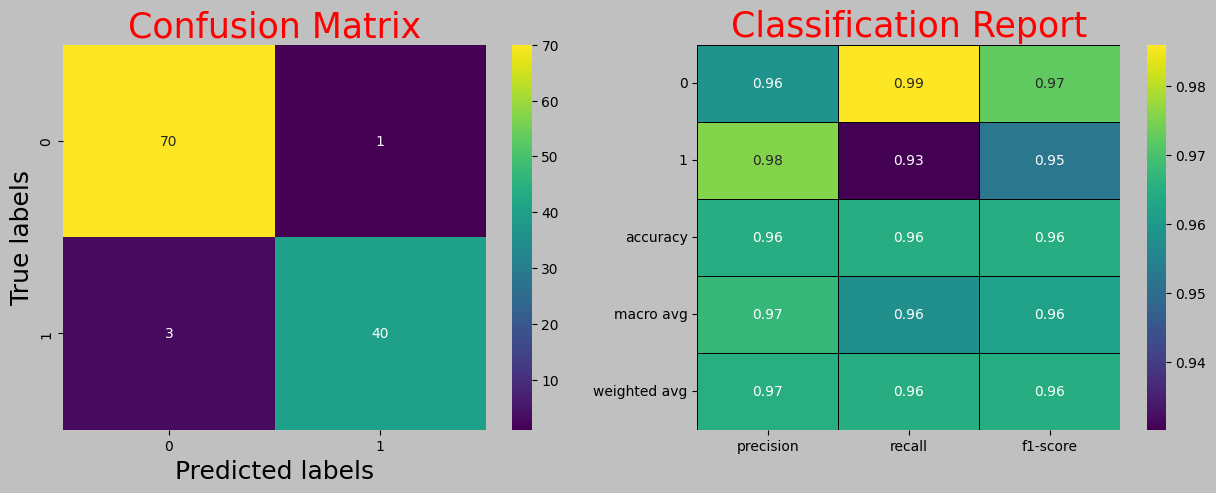

In [46]:
clf_plot(y_pred_rf, y_test)

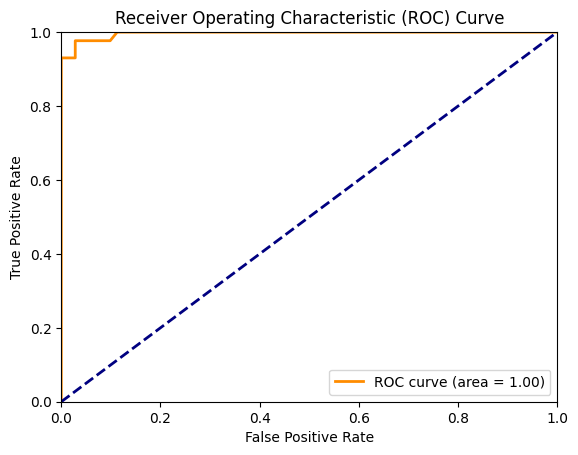

In [47]:
y_probs = rf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

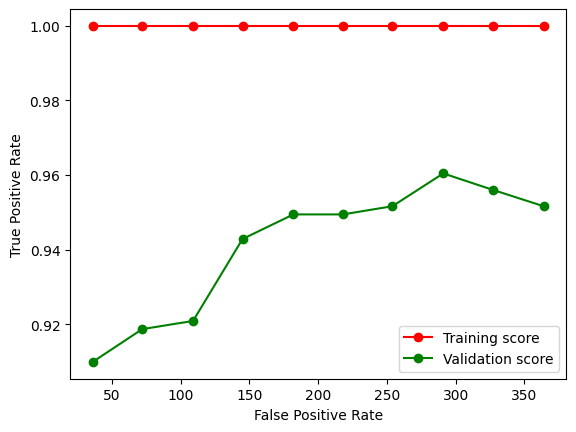

In [48]:
train_sizes, train_scores, valid_scores = learning_curve(
    rf, x_train, y_train, cv=5, 
    scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, valid_mean, 'o-', color='g', label='Validation score')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [49]:
from sklearn.metrics import log_loss
cost = log_loss(y_test, y_probs)
print(f'Log Loss: {cost:.4f}')

Log Loss: 0.0903


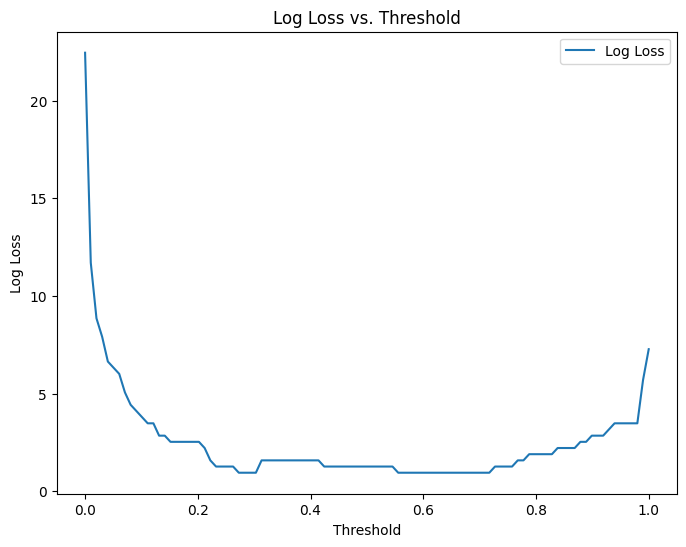

In [50]:
y_prob_rf = rf.predict_proba(x_test)[:, 1]
# Initialize thresholds and log losses
thresholds = np.linspace(0, 1, 100)
log_losses = []
# Calculate log loss for each threshold
for threshold in thresholds:
    # Apply threshold to create binary predictions
    y_pred_threshold = (y_prob_rf >= threshold).astype(int)    
    # Calculate and store log loss
    log_losses.append(log_loss(y_test, y_pred_threshold))
# Plot the Log Loss vs. Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, log_losses, label='Log Loss')
plt.xlabel('Threshold')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Threshold')
plt.legend(loc="upper right")
plt.show()

In [51]:
results = pd.DataFrame({'Threshold': thresholds,'Log Loss': log_losses})
best_threshold_row = results.loc[results['Log Loss'].idxmin()]
print(f"Best Threshold: {best_threshold_row['Threshold']}")
print(f"Corresponding Log Loss: {best_threshold_row['Log Loss']}")

Best Threshold: 0.27272727272727276
Corresponding Log Loss: 0.9485171944504516


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Log Loss Comparison</title>
</head>
<body>
    <h1>Log Loss Comparison</h1>
    <p><strong>Lower Log Loss (0.1086):</strong> This indicates that with the default threshold of 0.5, the model is performing better in terms of log loss. The predictions are more accurate, and the model's probability estimates align well with the true labels.</p>
    <p><strong>Higher Log Loss (1.26) with Threshold 0.43:</strong> This suggests that using a threshold of 0.43 results in worse performance compared to the default threshold. The model’s probability estimates are less accurate at this threshold, leading to higher log loss.</p>
</body>
</html>

In [53]:
rf_oob=RandomForestClassifier(oob_score=True)
rf_oob.fit(x_train,y_train)
y_pred_rf_oob=rf_oob.predict(x_test)
print("Train Score: ",rf.score(x_train,y_train))
print("Classification Report: ",classification_report(y_test,y_pred_rf_oob))
print("Accuracy Score: ",accuracy_score(y_test,y_pred_rf_oob))

Train Score:  1.0
Classification Report:                precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score:  0.956140350877193


In [54]:
confusion_matrix(y_test,y_pred_rf_oob)

array([[69,  2],
       [ 3, 40]], dtype=int64)

**Parameter Tuning**

In [60]:
param_grids={"n_estimators":[100,200],"criterion":["gini","entropy"],
           "max_depth":[None,10,20,30],"min_samples_split":[2,5,10],
           "min_samples_leaf":[1,2,4],"max_features":["auto","sqrt","log2"]}

In [61]:
rf_grid_ser=GridSearchCV(estimator=RandomForestClassifier(random_state=42,oob_score=True),param_grid=param_grids,cv=5)

In [62]:
rf_grid_ser.fit(x_train,y_train)
print(rf_grid_ser.best_params_)
print(rf_grid_ser.best_estimator_.oob_score_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
0.9692307692307692


In [63]:
y_pred_grid=rf_grid_ser.predict(x_test)
print("Train Score: ",rf_grid_ser.score(x_train,y_train))
print("Classification Report: ",classification_report(y_test,y_pred_grid))
print("Accuracy Score: ",accuracy_score(y_test,y_pred_grid))

Train Score:  0.9956043956043956
Classification Report:                precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy Score:  0.9649122807017544


In [67]:
rf_ran_ser=RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),param_distributions=param_grids,cv=6,n_iter=100)

In [68]:
rf_ran_ser.fit(x_train,y_train)
print(rf_ran_ser.best_params_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}


In [69]:
y_pred_ran=rf_ran_ser.predict(x_test)
print("Train Score: ",rf_ran_ser.score(x_train,y_train))
print("Classification Report: ",classification_report(y_test,y_pred_ran))
print("Accuracy Score: ",accuracy_score(y_test,y_pred_ran))

Train Score:  0.9868131868131869
Classification Report:                precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy Score:  0.9649122807017544
